<a href="https://colab.research.google.com/github/akinzayn/HPV-Research/blob/main/Penile_HPV_EDA_Note_9_%5BContinuous_Variable%5D_with_Report_Comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preparation**

## **Summary Of Report** 

The analyses were carried out on 24 continuous variables. A t-test was carried out to determine if there is at least a  difference in the means of the negative HPV and positive HPV at a p-value of 0.05. 

Height and Urinary arsenocholine variable were significant for both high and low HPV.  


Age, weight, cotinine, log of urinary monoethylarsonic were significant for only high HPV.  Urinary arsenobetaine, urinary dimethylarsinic acid, total urinary arsenic and total urinary arsenic variables were significant for only low HPV.

Below are the lists of signficant variables and their p-values.


### **Variables Significant For High and Low HPV**

1. Height: high HPV. p-value (~2.2e-16)
           low HPV. P-value (1.96e-08)
2. Urinary arsenocholine: high HPV. P-value (~0.0007)
           low HPV. P-value (~ 0.002)

### **Variables Significant For Only High HPV**

1. Age, p-value (~ 0.003)
2. Weight, p-value (~ 0.0013)
3. Cotinine, p-value (~ 2.2e-18)
4. Log of urinary monoethylarsonic (~ 0.02)

### **Variables Significant For Only Low HPV**

1.  Urinary arsenobetaine, p-value (0.002)
2.  Urinary dimethylarsinic acid, p-value (0.03)
3.  Total urinary arsenic, p-value (0.0003)
4.  Total urinary arsenic 2, p-value (0.005)


In [ ]:
#  https://stackoverflow.com/questions/34818723/export-notebook-to-pdf-without-code



# I was seeking the same question in SO and finally turned out to a very straightforward way:

# Assuming using Firefox(57) + Win7 or Any browser where you have access to console

# Run Jupyter notebook and download the notebook in the browser: File->Download as->HTML and you will get a html page with code and output.
# Open the exported HTML with browser and activate the browser console with key F12
# Run following command in the console:

# document.querySelectorAll("div.input").forEach(function(a){a.remove()})
# The code removes all input div DOM. Then right mouse button and chose "Save Page As" and Save the "Complete page" (not single page).

# You will get a page with an associated folder in windows. Use a trick by zip the html page and then extract to unbind the associated. The folder is useless.

# Now it is a single html page without code. You can re-distribute it or print it as PDF.

# If you are not using Firefox or Windows, please adjust the above 3-6 steps.




# I think now is document.querySelectorAll("div.jp-InputArea.jp-Cell-inputArea").forEach(function(a){a.remove()}) 
# but this for example will keep the errors and markdown with maybe you don't want. 
# To remove all input cells, not only code cells you could use:
#  document.querySelectorAll("jp-Cell jp-CodeCell jp-Notebook-cell").forEach(function(a){a.remove()}) 
#  but is a method to check which columns you want and remove them checking the name of the div.

In [ ]:
# clearing workspace
rm(list = ls())


In [ ]:
# loading packages
# to install magick

install.packages("pacman")
library(pacman)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:

p_load('tidyverse', "magrittr", "readxl", "googledrive")


In [ ]:
# loading work space and displaying variables in the workspace

#load("HSV_df.RData")
# ls()
# creating backup and displaying first 6 rows
drive_deauth()
drive_user()
public_file = drive_get(as_id("1i5Z2FeC_oPyOmDfA0p6eXR1iHgOdgGYqEhLd7WrQ5SQ"))
downloaded_file = drive_download(public_file, overwrite = TRUE)
HSV_df = read_excel("data_pHPV.all_rev3.xlsx")

HSV_df_back_up = HSV_df
#head(HSV_df)

ℹ Not logged in as any specific Google user.

File downloaded:

• data_pHPV.all_rev3 <id: 1i5Z2FeC_oPyOmDfA0p6eXR1iHgOdgGYqEhLd7WrQ5SQ>

Saved locally as:

• data_pHPV.all_rev3.xlsx

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting numeric in BL1763 / R1763C64: got 'NA'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting numeric in BL1765 / R1765C64: got 'NA'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting numeric in BL1772 / R1772C64: got 'NA'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting numeric in BL1773 / R1773C64: got 'NA'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting numeric in BL1778 / R1778C64: got 'NA'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting numeric in BL1795 / R1795C64:

In [ ]:
HSV_df <- as.data.frame(sapply(HSV_df, unlist))
HSV_df %<>% 
   mutate(across(where(is.character), ~na_if(., "NA")))
# head(HSV_df,3)



In [ ]:
HSV_df$RIDAGEYRCAT = cut(as.numeric(HSV_df$RIDAGEYR), breaks = c(18, 25, 45, 65, Inf), right = FALSE)


In [ ]:
# Gender
HSV_df$RIAGENDR = factor(HSV_df$RIAGENDR)
levels(HSV_df$RIAGENDR) = c("Male", "Female") 

# High HPV
HSV_df$high.HPV = factor(HSV_df$high.HPV)
levels(HSV_df$high.HPV) = c("Negative", "Positive") 

# Low HPV
HSV_df$low.HPV = factor(HSV_df$low.HPV)
levels(HSV_df$low.HPV) = c("Negative", "Positive") 

# Race
HSV_df$RIDRETH1 = factor(HSV_df$RIDRETH1)
levels(HSV_df$RIDRETH1) = c("Mex-Hisp", "Other-Hisp","Non-Hisp-WT","Non-Hisp-BK", "Others") 

# Education
HSV_df$DMDEDUC2 = factor(HSV_df$DMDEDUC2)
levels(HSV_df$DMDEDUC2) = c("Below 9th Grade", "9-11 Grade","HS or GED","Some College or AA", "Graduate") 

# Marital Status
HSV_df$DMDMARTL = factor(HSV_df$DMDMARTL)
levels(HSV_df$DMDMARTL) = c("Married", "Widowed","Divorced","Separated", "Never married", "Living with partner") 

# Smoking
HSV_df$LBDCOTLC = factor(HSV_df$LBDCOTLC)
levels(HSV_df$LBDCOTLC) = c("Above limit", "Below Limit") 

# Alcohol
HSV_df$ALQ101 = factor(HSV_df$ALQ101)
levels(HSV_df$ALQ101) = c("Yes", "No") 

# Poverty Income Level
HSV_df$PIR = factor(HSV_df$PIR)
# levels(HSV_df$PIR) = c("Yes", "No") 

# Body mass index
HSV_df$BMI.f = factor(HSV_df$BMI.f)
levels(HSV_df$BMI.f) = c("Underweight", "Normal weight" , "Overweight" , "Obesity") 


# Arsenic Level(1)
HSV_df$URDUA3LC.f = factor(HSV_df$URDUA3LC.f)
levels(HSV_df$URDUA3LC.f) = c("Above limit", "Below Limit") 

# Arsenic Level (2)
HSV_df$URDUA5LC.f = factor(HSV_df$URDUA5LC.f)
levels(HSV_df$URDUA5LC.f) = c("Above limit", "Below Limit") 

# Arsenic Level (3)
HSV_df$URDUABLC.f = factor(HSV_df$URDUABLC.f)
levels(HSV_df$URDUABLC.f) = c("Above limit", "Below Limit") 


# Arsenic Level (4)
HSV_df$URDUDALC.f = factor(HSV_df$URDUACLC.f)  
levels(HSV_df$URDUDALC.f) = c("Above limit", "Below Limit") 

# Arsenic Level (5)
HSV_df$URDUDALC.f = factor(HSV_df$URDUDALC.f)
levels(HSV_df$URDUDALC.f) = c("Above limit", "Below Limit") 

# Arsenic Level (6)
HSV_df$URDUMMAL.f = factor(HSV_df$URDUMMAL.f)
levels(HSV_df$URDUMMAL.f) = c("Above limit", "Below Limit") 


HSV_df_backup_postprep = HSV_df

In [ ]:

# freq function

freq = function(var, name = deparse(substitute(var))){
tbl = table( var)
freq_tbl = tbl %>% as.data.frame()
prop_tbl = as.data.frame(prop.table(tbl) * 100) %>% as.data.frame() %>% select(Freq) %>% rename( "% Freq" = Freq)
total = data.frame(var = "Total", Freq = sum(freq_tbl$Freq), "% Freq" = sum(prop_tbl$`% Freq`))
df = cbind(freq_tbl, prop_tbl)
colnames(total) = colnames(df)
df = rbind(df,total)
xname = c(name, colnames(df)[2:length(colnames(df))])
colnames(df) = xname
  return(df)
}

# ctable function

ctable_fn = function( x, y  ){

tbl = table( x, y) %>% as.data.frame.matrix()

prop_tbl = prop.table(tbl) 

tbl %<>% cbind(.,Total = rowSums(.)) %>% rbind(.,Total = colSums(.))

prop_tbl %<>% cbind(.,Total = rowSums(.)) %>% rbind(.,Total = colSums(.))

prop_tbl =  (prop_tbl * 100) %>% round(2)

break_point = dim(tbl)[2]
for(i in 1: dim(tbl)[2]){
  tbl[,i] = paste0(tbl[,i], " [ " , prop_tbl[,i],  "% ]" )
}


return(tbl)

}

In [ ]:

num_summary = function(df){

  ## provide summary of the numerical variables
res = df %>% 
  select_if(is.numeric) %>% 
  gather(variables, value)%>%
  group_by(variables) %>%
  summarise(Count = n(), Mean = mean(value, na.rm=TRUE), Min = quantile(value, 0, na.rm=TRUE), Q1 = quantile(value, 0.25, na.rm=TRUE), 
  Q2 = quantile(value, 0.5, na.rm=TRUE),  Q3 = quantile(value, 0.75, na.rm=TRUE), Max = quantile(value, 1, na.rm=TRUE),
   Sd = sd(value, na.rm=TRUE), .groups = 'drop') 

return(res)
}


In [ ]:
head(HSV_df)

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,DMDEDUC2,DMDMARTL,RIDEXPRG,⋯,URXUDMA.q,URDUDALC.f,ln.URXUDMA,URXUMMA.q,URDUMMAL.f,ln.URXUMMA,TUA.q,TUA1.q,TUA2.q,RIDAGEYRCAT
,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<fct>,<fct>,<fct>,<chr>,⋯,<chr>,<fct>,<chr>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,<fct>
1,83733,9,2,Male,53,NA,Non-Hisp-WT,HS or GED,Divorced,NA,⋯,Q3,Above limit,1.64093657949347,Q3,Above limit,-0.186329578191493,Q2,Q3,Q3,"[45,65)"
2,83741,9,2,Male,22,NA,Non-Hisp-BK,Some College or AA,Never married,NA,⋯,Q2,Below Limit,1.22671229129543,belowDL,Below Limit,-1.96611285637283,Q2,Q2,Q3,"[18,25)"
3,83743,9,2,Male,18,NA,Others,NA,NA,NA,⋯,Q2,Below Limit,1.14740245283754,Q1,Above limit,-1.6094379124341,Q3,Q2,Q3,"[18,25)"
4,83744,9,2,Male,56,NA,Non-Hisp-BK,HS or GED,Divorced,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,"[45,65)"
5,83747,9,2,Male,46,NA,Non-Hisp-WT,Graduate,Living with partner,NA,⋯,Q1,Below Limit,1.01523067972906,Q1,Above limit,-0.776528789498996,Q1,Q2,Q2,"[45,65)"
6,83750,9,2,Male,45,NA,Others,9-11 Grade,Never married,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,"[45,65)"


# **Analysis of Continuous Variables**

In [ ]:
HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(BMI != "NA") 

to_be_filtered_num = c('RIDAGEYR', 'INDFMPIR' , 'BMXWT' , 'BMXHT' , 
                        'BMXBMI' ,  'BMI' , 'LBXCOT' , 'URXUAS3' , 'URXUAS5' , 'URXUAB' , 'URXUAC' ,
                         'URXUDMA' , 'URXUMMA' , 'ln.URXUAS3' , 'ln.URXUAS5' , 'ln.URXUAB' ,
                          'ln.URXUAC' , 'ln.URXUDMA' , 'ln.URXUMMA', 'TUA', 'TUA1', 'TUA2')


HSV_df_num = HSV_df %>% select(all_of(to_be_filtered_num))

HSV_df_num <- lapply(HSV_df_num, function(x) {
    if(is.character(x)) as.numeric(x) else x
}) %>% as.data.frame()

HSV_df_num$BMI = as.numeric(HSV_df_num$BMI )
HSV_df_num$RIDAGEYR = as.numeric(HSV_df_num$RIDAGEYR )

num_summary(HSV_df_num)



variables,Count,Mean,Min,Q1,Q2,Q3,Max,Sd
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BMI,3581,28.5535325,14.1000000,24.1000000,27.5000000,31.6000000,74.100000,6.5245743
BMXBMI,3581,28.5535325,14.1000000,24.1000000,27.5000000,31.6000000,74.100000,6.5245743
BMXHT,3581,174.6744932,136.5000000,169.5000000,174.7000000,179.9000000,202.700000,7.7831459
BMXWT,3581,87.3872661,32.8000000,72.1000000,83.3000000,97.8000000,222.600000,21.9822491
INDFMPIR,3581,2.5202992,0.0000000,1.0600000,2.1500000,4.1900000,5.000000,1.6614199
LBXCOT,3581,76.4055961,0.0110000,0.0150000,0.0760000,100.0000000,1160.000000,145.1030071
ln.URXUAB,3581,0.7702074,-0.1984509,-0.1984509,-0.1984509,1.4951387,6.618739,1.3081116
ln.URXUAC,3581,-2.2676544,-2.5257286,-2.5257286,-2.5257286,-2.5257286,2.660260,0.6155617
ln.URXUAS3,3581,-0.9731806,-2.5257286,-2.1202635,-0.6539265,-0.1743534,1.786747,1.0300780


## **Age**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(RIDAGEYR, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$RIDAGEYR = as.numeric(HSV_df_to_use$RIDAGEYR)

t.test(RIDAGEYR ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  RIDAGEYR by high.HPV
t = -1.2246, df = 1362.4, p-value = 0.2209
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -1.5478594  0.3580829
sample estimates:
mean in group Negative mean in group Positive 
              37.62897               38.22386 



For the t-test above, the p-value( ~ 0.003 )is less than alpha level (0.05). Hence there is a significant difference in the mean **age** of the negative (42.41) high HPV and positive (44.92) high HPV.



In [ ]:
high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
summarise(Count = n(), Mean = mean(RIDAGEYR, na.rm=TRUE), Min = quantile(RIDAGEYR, 0, na.rm=TRUE), Q1 = quantile(RIDAGEYR, 0.25, na.rm=TRUE), 
  Q2 = quantile(RIDAGEYR, 0.5, na.rm=TRUE),  Q3 = quantile(RIDAGEYR, 0.75, na.rm=TRUE), Max = quantile(RIDAGEYR, 1, na.rm=TRUE),
   Sd = sd(RIDAGEYR, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(RIDAGEYR, na.rm=TRUE), Min = quantile(RIDAGEYR, 0, na.rm=TRUE), Q1 = quantile(RIDAGEYR, 0.25, na.rm=TRUE), 
  Q2 = quantile(RIDAGEYR, 0.5, na.rm=TRUE),  Q3 = quantile(RIDAGEYR, 0.75, na.rm=TRUE), Max = quantile(RIDAGEYR, 1, na.rm=TRUE),
   Sd = sd(RIDAGEYR, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")



high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,2768,37.63,18,27,38,48,59,12.49248,0.47
Positive,813,38.22,18,28,37,49,59,12.08393,0.83
Total,3581,37.76,18,27,37,48,59,12.40174,0.41




From the table above those who tested negative for high HPV are roughly 29 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


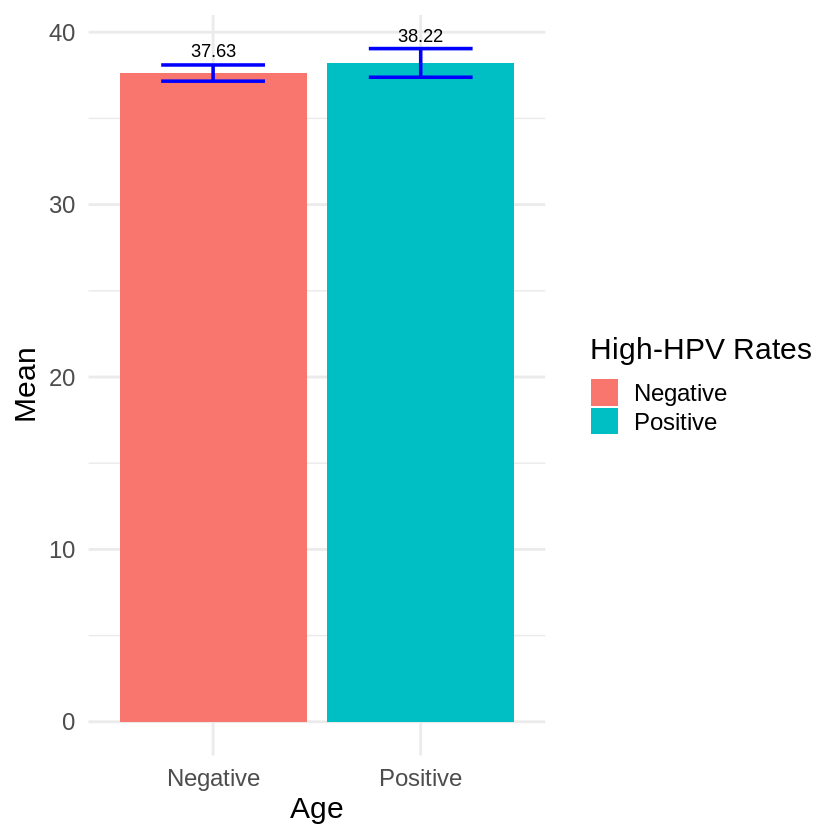

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Age", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)


The bar plot above shows the means of the negative and positive values for high HPV. 

### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(RIDAGEYR, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$RIDAGEYR = as.numeric(HSV_df_to_use$RIDAGEYR)

t.test(RIDAGEYR ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  RIDAGEYR by low.HPV
t = -2.2471, df = 201.49, p-value = 0.02572
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -3.7502697 -0.2446958
sample estimates:
mean in group Negative mean in group Positive 
              37.66363               39.66111 



For the t-test above, the p-value( ~ 0.17 )is greater than alpha level (0.05). Hence there is no significant difference in the mean **age** of the negative (42.48) low HPV and positive (45.85) low HPV.



In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(RIDAGEYR, na.rm=TRUE), Min = quantile(RIDAGEYR, 0, na.rm=TRUE), Q1 = quantile(RIDAGEYR, 0.25, na.rm=TRUE), 
  Q2 = quantile(RIDAGEYR, 0.5, na.rm=TRUE),  Q3 = quantile(RIDAGEYR, 0.75, na.rm=TRUE), Max = quantile(RIDAGEYR, 1, na.rm=TRUE),
   Sd = sd(RIDAGEYR, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(RIDAGEYR, na.rm=TRUE), Min = quantile(RIDAGEYR, 0, na.rm=TRUE), Q1 = quantile(RIDAGEYR, 0.25, na.rm=TRUE), 
  Q2 = quantile(RIDAGEYR, 0.5, na.rm=TRUE),  Q3 = quantile(RIDAGEYR, 0.75, na.rm=TRUE), Max = quantile(RIDAGEYR, 1, na.rm=TRUE),
   Sd = sd(RIDAGEYR, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3401,37.66,18,27,37.0,48,59,12.43736,0.42
Positive,180,39.66,18,29,39.5,50,59,11.57785,1.70
Total,3581,37.76,18,27,37.0,48,59,12.40174,0.41




From the table above those who tested negative for high HPV are roughly 200 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


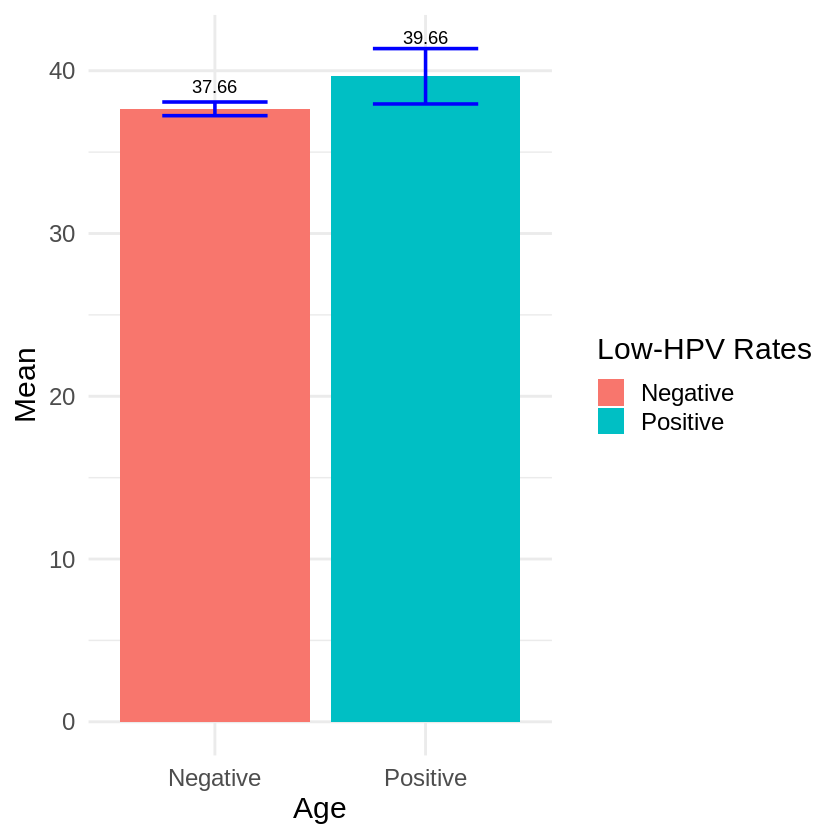

In [ ]:

cat("\n\n\n")



ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean	, fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Age", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - .8)) +
      geom_errorbar(aes(ymin = Mean	 - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)




The bar plot above shows the means of the negative and positive values for low HPV. 

## **Body Mass Index**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(BMI, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$BMI = as.numeric(HSV_df_to_use$BMI)

t.test(BMI ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  BMI by high.HPV
t = 1.7957, df = 1444, p-value = 0.07276
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.04089811  0.92604011
sample estimates:
mean in group Negative mean in group Positive 
              28.65401               28.21144 



For the t-test above, the p-value( ~ 0.30 )is greater than alpha level (0.05). Hence there is no significant difference in the mean **BMI** of the negative (29.26) high HPV and positive (28.88) high HPV.



In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(BMI, na.rm=TRUE), Min = quantile(BMI, 0, na.rm=TRUE), Q1 = quantile(BMI, 0.25, na.rm=TRUE), 
  Q2 = quantile(BMI, 0.5, na.rm=TRUE),  Q3 = quantile(BMI, 0.75, na.rm=TRUE), Max = quantile(BMI, 1, na.rm=TRUE),
   Sd = sd(BMI, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(BMI, na.rm=TRUE), Min = quantile(BMI, 0, na.rm=TRUE), Q1 = quantile(BMI, 0.25, na.rm=TRUE), 
  Q2 = quantile(BMI, 0.5, na.rm=TRUE),  Q3 = quantile(BMI, 0.75, na.rm=TRUE), Max = quantile(BMI, 1, na.rm=TRUE),
   Sd = sd(BMI, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,2768,28.65,14.1,24.1,27.6,31.7,74.1,6.660684,0.25
Positive,813,28.21,15.4,23.9,27.3,31.6,64.3,6.029546,0.42
Total,3581,28.55,14.1,24.1,27.5,31.6,74.1,6.524574,0.21



From the table above those who tested negative for high HPV are roughly 27 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


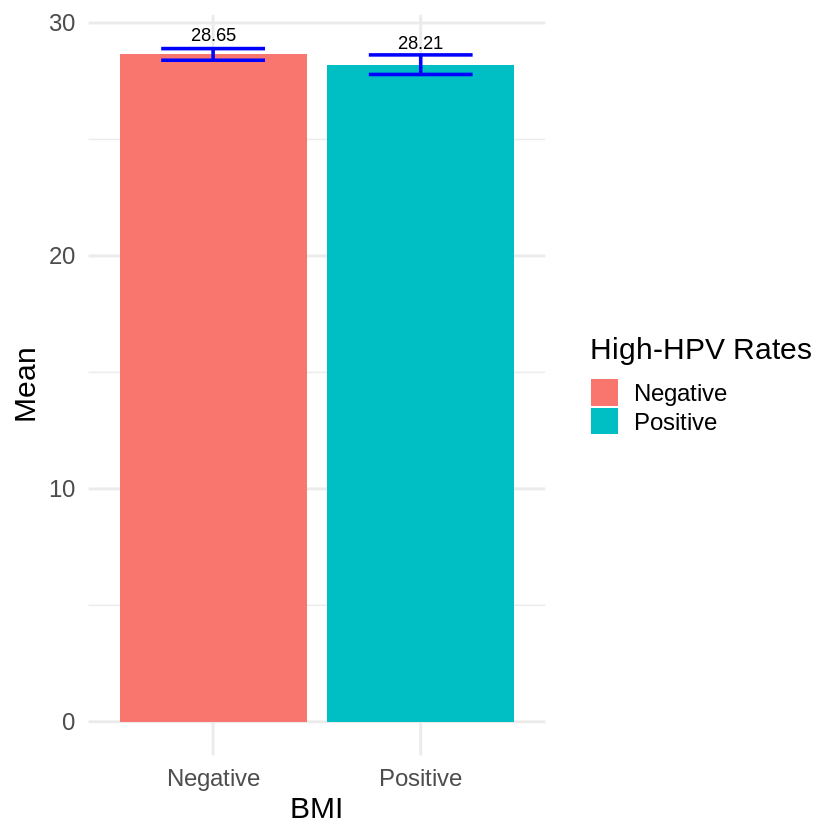

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "BMI", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)


The bar plot above shows the means of the negative and positive values for high HPV. 

### **Low HPV section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(BMI, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$BMI = as.numeric(HSV_df_to_use$BMI)

t.test(BMI ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  BMI by low.HPV
t = -0.44549, df = 198.35, p-value = 0.6564
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -1.2082723  0.7629533
sample estimates:
mean in group Negative mean in group Positive 
              28.54234               28.76500 



For the t-test above, the p-value( ~ 0.10 )is greater than alpha level (0.05). Hence there is no significant difference in the mean **BMI** of the negative (29.26) low HPV and positive (28.88) low HPV.



In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(BMI, na.rm=TRUE), Min = quantile(BMI, 0, na.rm=TRUE), Q1 = quantile(BMI, 0.25, na.rm=TRUE), 
  Q2 = quantile(BMI, 0.5, na.rm=TRUE),  Q3 = quantile(BMI, 0.75, na.rm=TRUE), Max = quantile(BMI, 1, na.rm=TRUE),
   Sd = sd(BMI, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(BMI, na.rm=TRUE), Min = quantile(BMI, 0, na.rm=TRUE), Q1 = quantile(BMI, 0.25, na.rm=TRUE), 
  Q2 = quantile(BMI, 0.5, na.rm=TRUE),  Q3 = quantile(BMI, 0.75, na.rm=TRUE), Max = quantile(BMI, 1, na.rm=TRUE),
   Sd = sd(BMI, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3401,28.54,15.1,24.0,27.50,31.7,74.1,6.524771,0.22
Positive,180,28.76,14.1,24.7,27.85,31.3,64.3,6.535417,0.96
Total,3581,28.55,14.1,24.1,27.50,31.6,74.1,6.524574,0.21



From the table above those who tested negative for high HPV are roughly 200 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


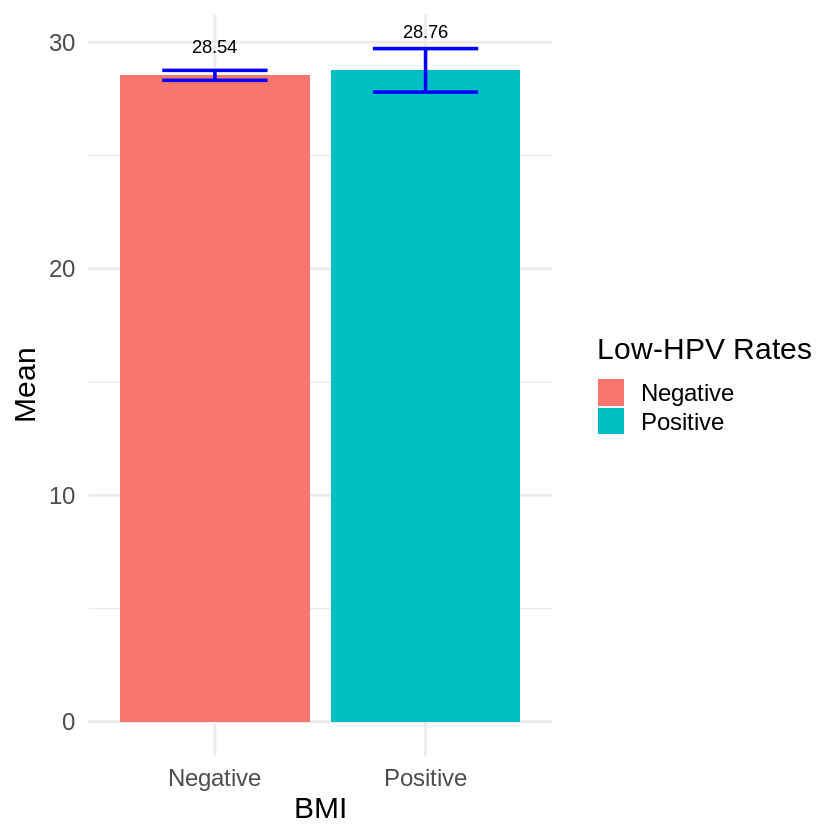

In [ ]:


ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "BMI", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)





The bar plot above shows the means of the negative and positive values for low HPV. 

## **Family Poverty Income Ratio**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(INDFMPIR, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$INDFMPIR = as.numeric(HSV_df_to_use$INDFMPIR)

t.test(INDFMPIR ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  INDFMPIR by high.HPV
t = 3.667, df = 1269.6, p-value = 0.0002556
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 0.1150709 0.3798563
sample estimates:
mean in group Negative mean in group Positive 
              2.576970               2.329507 



For the t-test above, the p-value( ~ 0.14 )is greater than alpha level (0.05). Hence there is no significant difference in the mean **PIR** of the negative (2.50) high HPV and positive (2.31) high HPV.



In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(INDFMPIR, na.rm=TRUE), Min = quantile(INDFMPIR, 0, na.rm=TRUE), Q1 = quantile(INDFMPIR, 0.25, na.rm=TRUE), 
  Q2 = quantile(INDFMPIR, 0.5, na.rm=TRUE),  Q3 = quantile(INDFMPIR, 0.75, na.rm=TRUE), Max = quantile(INDFMPIR, 1, na.rm=TRUE),
   Sd = sd(INDFMPIR, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(INDFMPIR, na.rm=TRUE), Min = quantile(INDFMPIR, 0, na.rm=TRUE), Q1 = quantile(INDFMPIR, 0.25, na.rm=TRUE), 
  Q2 = quantile(INDFMPIR, 0.5, na.rm=TRUE),  Q3 = quantile(INDFMPIR, 0.75, na.rm=TRUE), Max = quantile(INDFMPIR, 1, na.rm=TRUE),
   Sd = sd(INDFMPIR, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,2525,2.58,0,1.0900,2.230,4.28,5,1.673232,0.07
Positive,750,2.33,0,0.9625,1.885,3.58,5,1.607478,0.12
Total,3275,2.52,0,1.0600,2.150,4.19,5,1.661420,0.06



From the table above those who tested negative for high HPV are roughly 27 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


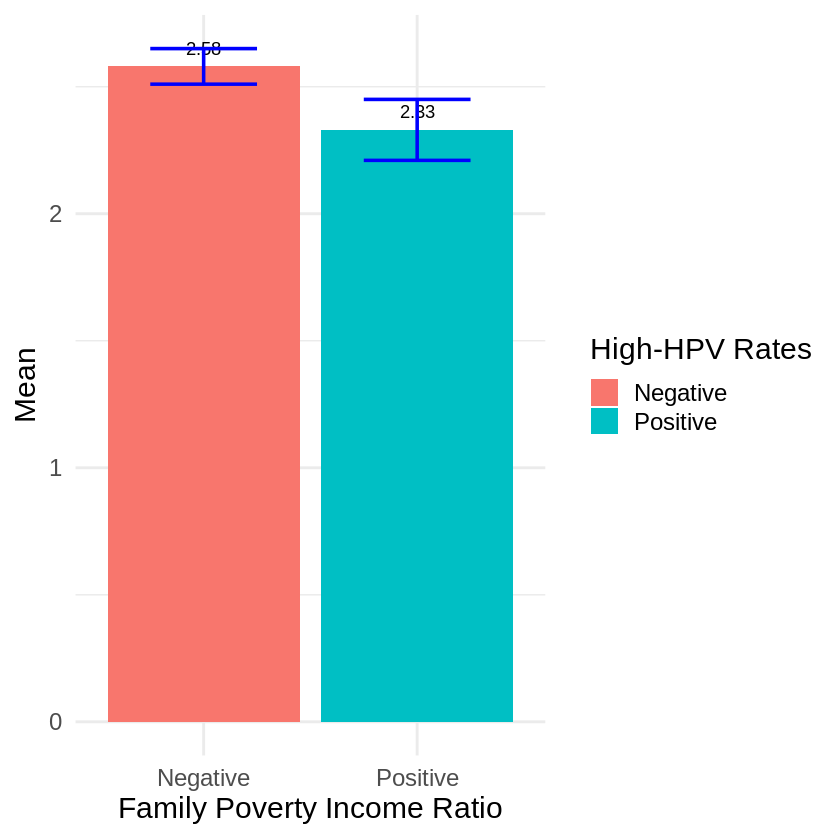

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Family Poverty Income Ratio", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)



The bar plot above shows the means of the negative and positive values for high HPV. 


### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(INDFMPIR, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$INDFMPIR = as.numeric(HSV_df_to_use$INDFMPIR)

t.test(INDFMPIR ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  INDFMPIR by low.HPV
t = 0.42964, df = 175.32, p-value = 0.668
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.2042281  0.3178921
sample estimates:
mean in group Negative mean in group Positive 
              2.523058               2.466226 



For the t-test above, the p-value( ~ 0.56 )is greater than alpha level (0.05). Hence there is no significant difference in the mean **PIR** of the negative (2.45) low HPV and positive (2.58) low HPV.



In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(INDFMPIR, na.rm=TRUE), Min = quantile(INDFMPIR, 0, na.rm=TRUE), Q1 = quantile(INDFMPIR, 0.25, na.rm=TRUE), 
  Q2 = quantile(INDFMPIR, 0.5, na.rm=TRUE),  Q3 = quantile(INDFMPIR, 0.75, na.rm=TRUE), Max = quantile(INDFMPIR, 1, na.rm=TRUE),
   Sd = sd(INDFMPIR, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(INDFMPIR, na.rm=TRUE), Min = quantile(INDFMPIR, 0, na.rm=TRUE), Q1 = quantile(INDFMPIR, 0.25, na.rm=TRUE), 
  Q2 = quantile(INDFMPIR, 0.5, na.rm=TRUE),  Q3 = quantile(INDFMPIR, 0.75, na.rm=TRUE), Max = quantile(INDFMPIR, 1, na.rm=TRUE),
   Sd = sd(INDFMPIR, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3116,2.52,0,1.060,2.15,4.19,5,1.663462,0.06
Positive,159,2.47,0,1.125,2.11,4.05,5,1.625071,0.25
Total,3275,2.52,0,1.060,2.15,4.19,5,1.661420,0.06



From the table above those who tested negative for high HPV are roughly 200 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


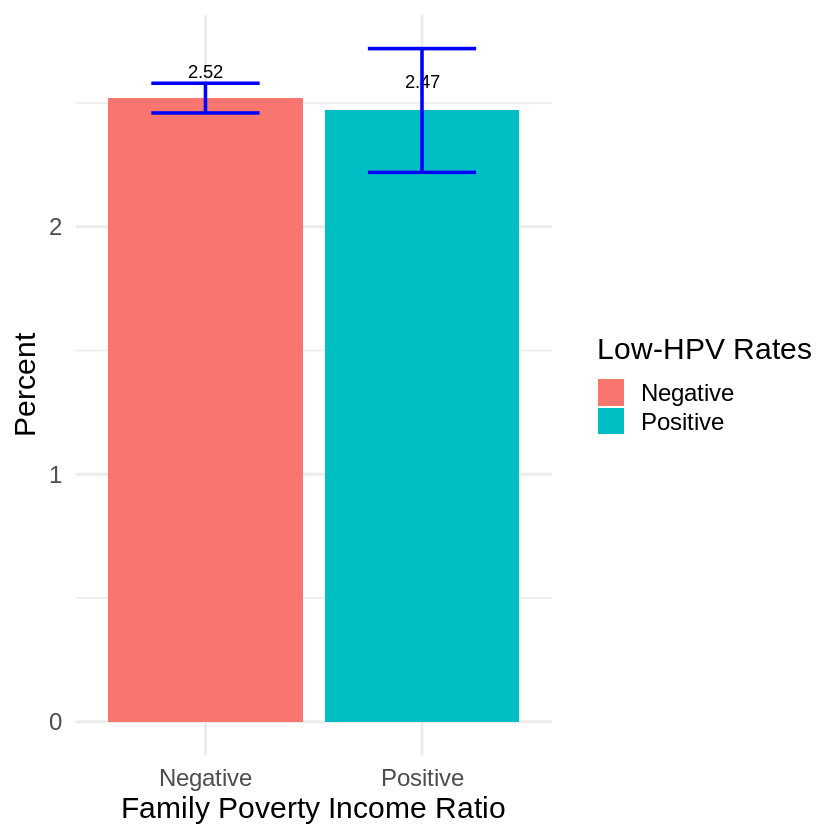

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Family Poverty Income Ratio", y = "Percent", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)






The bar plot above shows the means of the negative and positive values for low HPV. 

## **Weight**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(BMXWT, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$BMXWT = as.numeric(HSV_df_to_use$BMXWT)

t.test(BMXWT ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  BMXWT by high.HPV
t = 0.70915, df = 1428.7, p-value = 0.4783
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -1.047027  2.232684
sample estimates:
mean in group Negative mean in group Positive 
              87.52186               86.92903 



For the t-test above, the p-value( ~ 0.001 )is less than alpha level (0.05). Hence there is a significant difference in the mean **weight** of the negative (2.50) high HPV and positive (2.31) high HPV.




In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(BMXWT, na.rm=TRUE), Min = quantile(BMXWT, 0, na.rm=TRUE), Q1 = quantile(BMXWT, 0.25, na.rm=TRUE), 
  Q2 = quantile(BMXWT, 0.5, na.rm=TRUE),  Q3 = quantile(BMXWT, 0.75, na.rm=TRUE), Max = quantile(BMXWT, 1, na.rm=TRUE),
   Sd = sd(BMXWT, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(BMXWT, na.rm=TRUE), Min = quantile(BMXWT, 0, na.rm=TRUE), Q1 = quantile(BMXWT, 0.25, na.rm=TRUE), 
  Q2 = quantile(BMXWT, 0.5, na.rm=TRUE),  Q3 = quantile(BMXWT, 0.75, na.rm=TRUE), Max = quantile(BMXWT, 1, na.rm=TRUE),
   Sd = sd(BMXWT, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,2768,87.52,32.8,72.0,83.3,97.825,222.6,22.39697,0.83
Positive,813,86.93,47.3,72.5,83.4,97.600,193.6,20.51401,1.41
Total,3581,87.39,32.8,72.1,83.3,97.800,222.6,21.98225,0.72



From the table above those who tested negative for high HPV are roughly 27 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


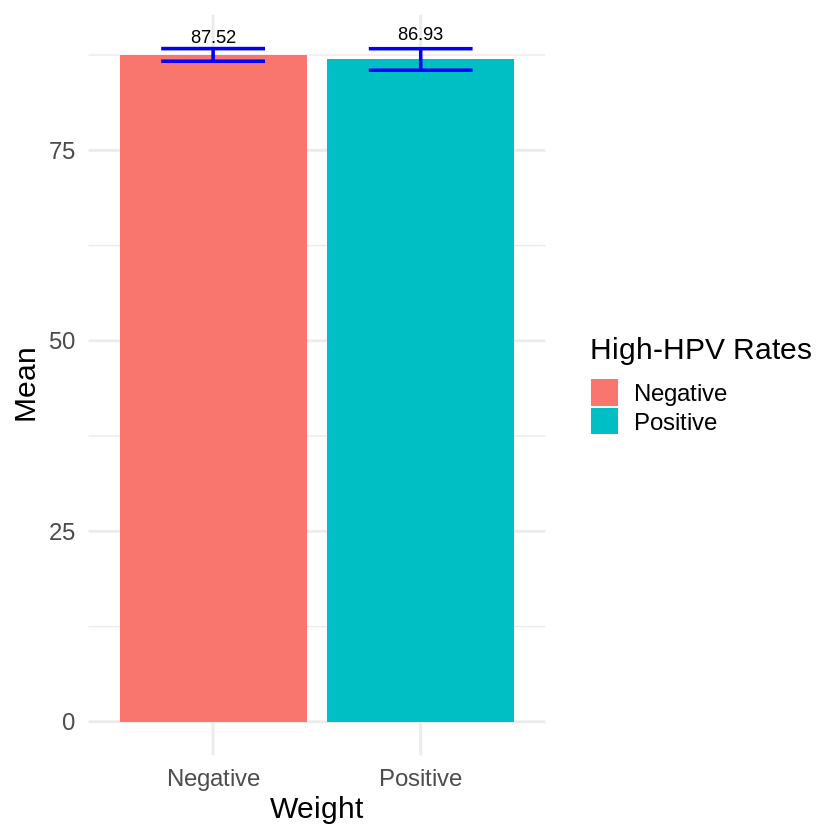

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Weight", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.05)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)


The bar plot above shows the means of the negative and positive values for high HPV. 

### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(BMXWT, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$BMXWT = as.numeric(HSV_df_to_use$BMXWT)

t.test(BMXWT ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  BMXWT by low.HPV
t = -0.8489, df = 197.84, p-value = 0.397
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -4.806977  1.913863
sample estimates:
mean in group Negative mean in group Positive 
              87.31455               88.76111 



For the t-test above, the p-value( ~ 0.33 )is greater than alpha level (0.05). Hence there is a significant difference in the mean **weight** of the negative (82.10) low HPV and positive (85.13) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(BMXWT, na.rm=TRUE), Min = quantile(BMXWT, 0, na.rm=TRUE), Q1 = quantile(BMXWT, 0.25, na.rm=TRUE), 
  Q2 = quantile(BMXWT, 0.5, na.rm=TRUE),  Q3 = quantile(BMXWT, 0.75, na.rm=TRUE), Max = quantile(BMXWT, 1, na.rm=TRUE),
   Sd = sd(BMXWT, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(BMXWT, na.rm=TRUE), Min = quantile(BMXWT, 0, na.rm=TRUE), Q1 = quantile(BMXWT, 0.25, na.rm=TRUE), 
  Q2 = quantile(BMXWT, 0.5, na.rm=TRUE),  Q3 = quantile(BMXWT, 0.75, na.rm=TRUE), Max = quantile(BMXWT, 1, na.rm=TRUE),
   Sd = sd(BMXWT, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3401,87.31,39.2,72.0,83.3,97.700,222.6,21.96641,0.74
Positive,180,88.76,32.8,74.8,84.6,98.475,193.6,22.29662,3.28
Total,3581,87.39,32.8,72.1,83.3,97.800,222.6,21.98225,0.72



From the table above those who tested negative for low HPV are roughly 200 times those who tested positive for low HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


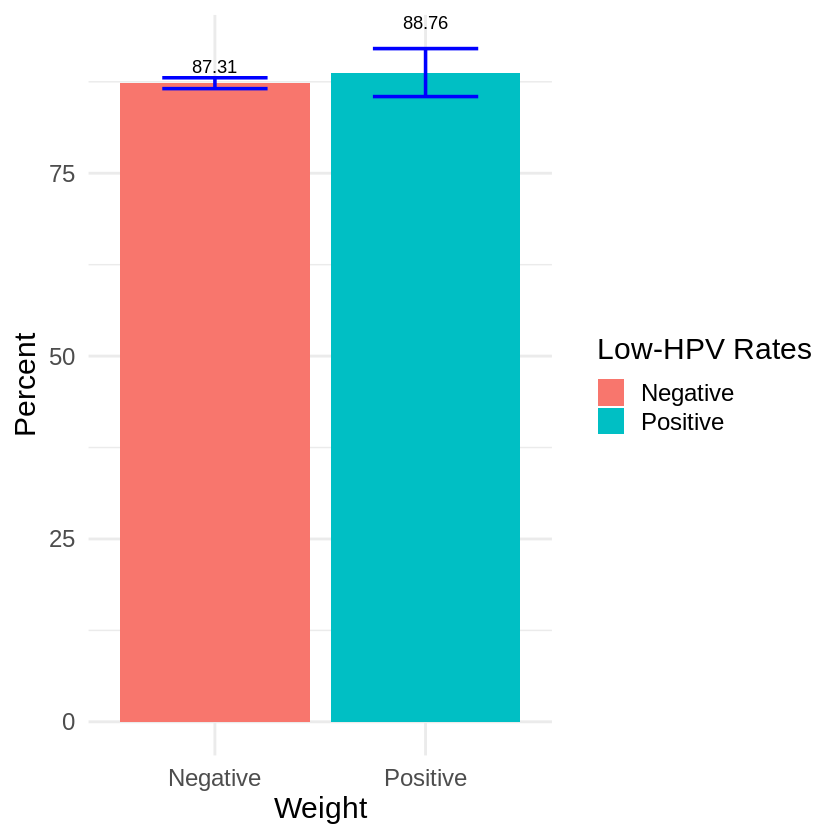

In [ ]:

cat("\n\n\n")
cat("\n\n\n")
ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Weight", y = "Percent", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.05)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)







The bar plot above shows the means of the negative and positive values for low HPV. 


## **Height**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(BMXHT, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$BMXHT = as.numeric(HSV_df_to_use$BMXHT)

t.test(BMXHT ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  BMXHT by high.HPV
t = -2.6537, df = 1381.3, p-value = 0.008052
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -1.3937240 -0.2089761
sample estimates:
mean in group Negative mean in group Positive 
              174.4926               175.2939 



For the t-test above, the p-value( 2.2e-16 ) is less than alpha level (0.05). Hence there is a significant difference in the mean **height** of the negative (167.14) high HPV and positive (172.17) high HPV.




In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(BMXHT, na.rm=TRUE), Min = quantile(BMXHT, 0, na.rm=TRUE), Q1 = quantile(BMXHT, 0.25, na.rm=TRUE), 
  Q2 = quantile(BMXHT, 0.5, na.rm=TRUE),  Q3 = quantile(BMXHT, 0.75, na.rm=TRUE), Max = quantile(BMXHT, 1, na.rm=TRUE),
   Sd = sd(BMXHT, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(BMXHT, na.rm=TRUE), Min = quantile(BMXHT, 0, na.rm=TRUE), Q1 = quantile(BMXHT, 0.25, na.rm=TRUE), 
  Q2 = quantile(BMXHT, 0.5, na.rm=TRUE),  Q3 = quantile(BMXHT, 0.75, na.rm=TRUE), Max = quantile(BMXHT, 1, na.rm=TRUE),
   Sd = sd(BMXHT, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,2768,174.49,136.5,169.30,174.5,179.9,202.6,7.861398,0.29
Positive,813,175.29,150.7,170.55,175.7,180.1,202.7,7.482198,0.52
Total,3581,174.67,136.5,169.50,174.7,179.9,202.7,7.783146,0.26



From the table above those who tested negative for high HPV are roughly 27 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


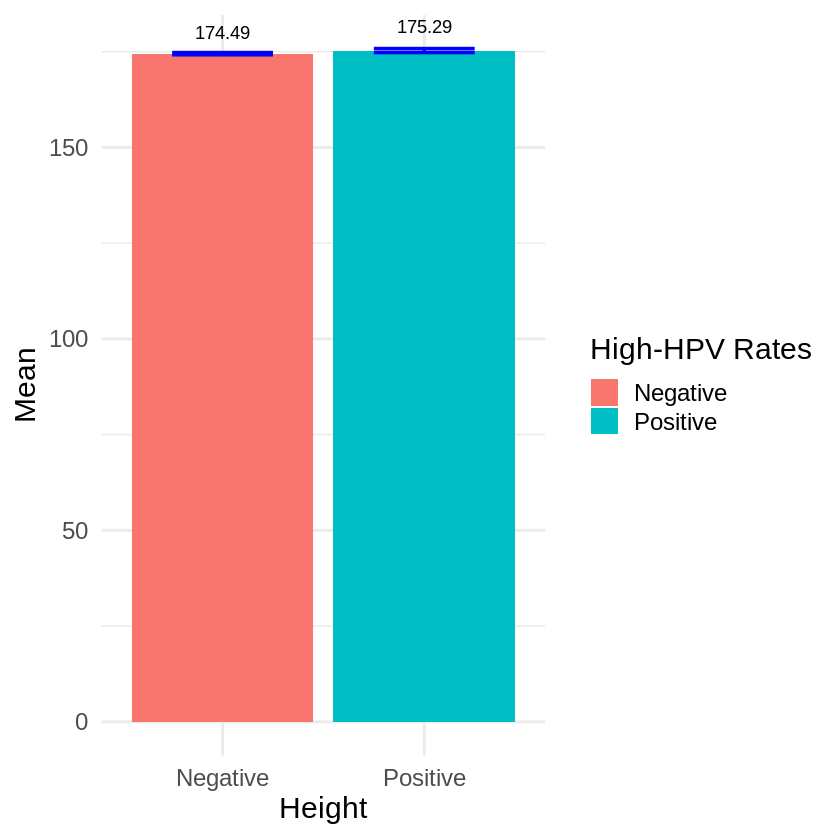

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Height", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)


The bar plot above shows the means of the negative and positive values for high HPV. 

### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(BMXHT, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$BMXHT = as.numeric(HSV_df_to_use$BMXHT)

t.test(BMXHT ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  BMXHT by low.HPV
t = -1.1845, df = 200.13, p-value = 0.2376
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -1.8103744  0.4516179
sample estimates:
mean in group Negative mean in group Positive 
              174.6403               175.3197 



For the t-test above, the p-value( 2.2e-16 )is less than alpha level (0.05). Hence there is a significant difference in the mean **height** of the negative (167.28) low HPV and positive (174.79) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(BMXHT, na.rm=TRUE), Min = quantile(BMXHT, 0, na.rm=TRUE), Q1 = quantile(BMXHT, 0.25, na.rm=TRUE), 
  Q2 = quantile(BMXHT, 0.5, na.rm=TRUE),  Q3 = quantile(BMXHT, 0.75, na.rm=TRUE), Max = quantile(BMXHT, 1, na.rm=TRUE),
   Sd = sd(BMXHT, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(BMXHT, na.rm=TRUE), Min = quantile(BMXHT, 0, na.rm=TRUE), Q1 = quantile(BMXHT, 0.25, na.rm=TRUE), 
  Q2 = quantile(BMXHT, 0.5, na.rm=TRUE),  Q3 = quantile(BMXHT, 0.75, na.rm=TRUE), Max = quantile(BMXHT, 1, na.rm=TRUE),
   Sd = sd(BMXHT, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3401,174.64,136.5,169.5000,174.7,179.900,202.7,7.798279,0.26
Positive,180,175.32,150.8,170.8125,175.1,180.225,197.0,7.483062,1.10
Total,3581,174.67,136.5,169.5000,174.7,179.900,202.7,7.783146,0.26



From the table above those who tested negative for low HPV are roughly 200 times those who tested positive for low HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


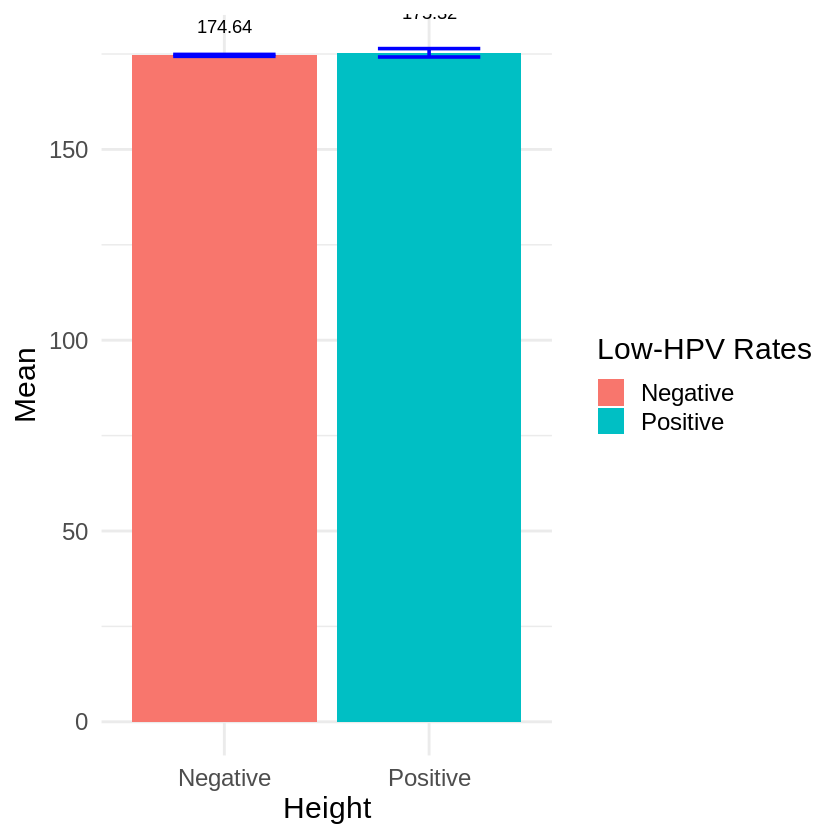

In [ ]:

cat("\n\n\n")

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Height", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)







The bar plot above shows the means of the negative and positive values for low HPV. 


## **Cotinine**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(LBXCOT, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$LBXCOT = as.numeric(HSV_df_to_use$LBXCOT)

t.test(LBXCOT ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")


 


	Welch Two Sample t-test

data:  LBXCOT by high.HPV
t = -7.4846, df = 1083.6, p-value = 1.482e-13
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -62.20521 -36.36436
sample estimates:
mean in group Negative mean in group Positive 
              65.27072              114.55551 



For the t-test above, the p-value( 2.2e-16 )is less than alpha level (0.05). Hence there is a significant difference in the mean **cotinine** of the negative (56.50) high HPV and positive (106.40) high HPV.




In [ ]:
high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
summarise(Count = n(), Mean = mean(LBXCOT, na.rm=TRUE), Min = quantile(LBXCOT, 0, na.rm=TRUE), Q1 = quantile(LBXCOT, 0.25, na.rm=TRUE), 
  Q2 = quantile(LBXCOT, 0.5, na.rm=TRUE),  Q3 = quantile(LBXCOT, 0.75, na.rm=TRUE), Max = quantile(LBXCOT, 1, na.rm=TRUE),
   Sd = sd(LBXCOT, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(LBXCOT, na.rm=TRUE), Min = quantile(LBXCOT, 0, na.rm=TRUE), Q1 = quantile(LBXCOT, 0.25, na.rm=TRUE), 
  Q2 = quantile(LBXCOT, 0.5, na.rm=TRUE),  Q3 = quantile(LBXCOT, 0.75, na.rm=TRUE), Max = quantile(LBXCOT, 1, na.rm=TRUE),
   Sd = sd(LBXCOT, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,2645,65.27,0.011,0.01100,0.049,42.4,1030,135.8821,5.18
Positive,772,114.56,0.011,0.03175,8.800,192.0,1160,167.5847,11.84
Total,3417,76.41,0.011,0.01500,0.076,100.0,1160,145.1030,4.87



From the table above those who tested negative for high HPV are roughly 27 times those who tested positive for high HPV in number. Also, the distributions are different accross the major quantiles and the variance of the two groups are different.


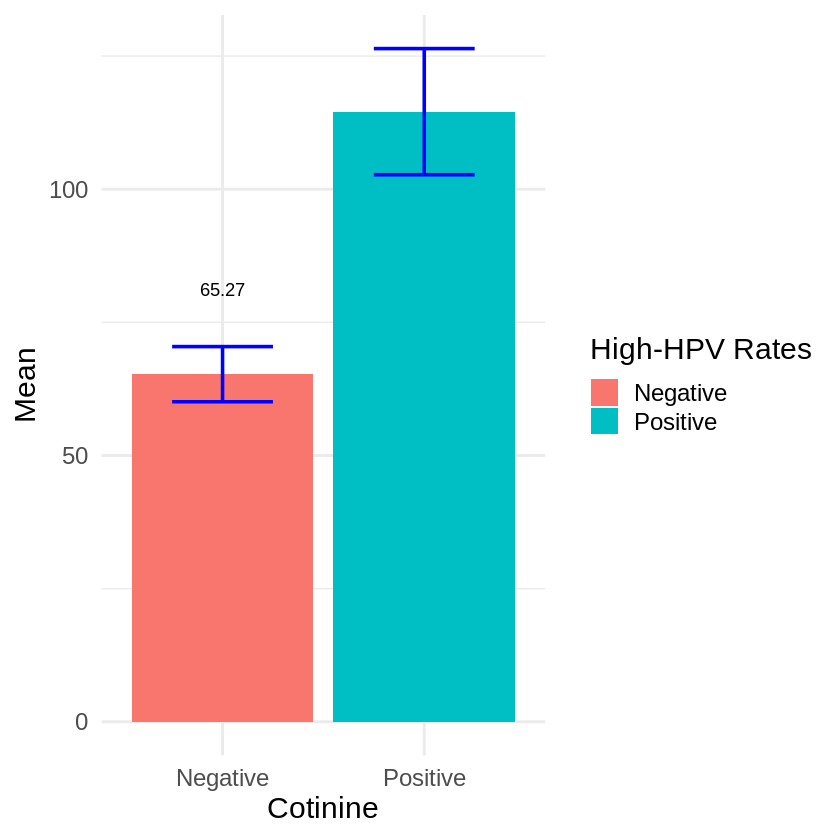

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Cotinine", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)


The bar plot above shows the means of the negative and positive values for high HPV. 

### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(LBXCOT, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$LBXCOT = as.numeric(HSV_df_to_use$LBXCOT)

t.test(LBXCOT ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  LBXCOT by low.HPV
t = -3.4307, df = 181.46, p-value = 0.0007453
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -78.75059 -21.24193
sample estimates:
mean in group Negative mean in group Positive 
              73.88896              123.88522 



For the t-test above, the p-value(~ 0.08 )is greater than alpha level (0.05). Hence there is no significant difference in the mean **cotinine** of the negative (58.03) low HPV and positive (96.88) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(LBXCOT, na.rm=TRUE), Min = quantile(LBXCOT, 0, na.rm=TRUE), Q1 = quantile(LBXCOT, 0.25, na.rm=TRUE), 
  Q2 = quantile(LBXCOT, 0.5, na.rm=TRUE),  Q3 = quantile(LBXCOT, 0.75, na.rm=TRUE), Max = quantile(LBXCOT, 1, na.rm=TRUE),
   Sd = sd(LBXCOT, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(LBXCOT, na.rm=TRUE), Min = quantile(LBXCOT, 0, na.rm=TRUE), Q1 = quantile(LBXCOT, 0.25, na.rm=TRUE), 
  Q2 = quantile(LBXCOT, 0.5, na.rm=TRUE),  Q3 = quantile(LBXCOT, 0.75, na.rm=TRUE), Max = quantile(LBXCOT, 1, na.rm=TRUE),
   Sd = sd(LBXCOT, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3245,73.89,0.011,0.01500,0.0720,87.60,1160,142.0431,4.89
Positive,172,123.89,0.011,0.02825,1.1355,227.25,960,188.3046,28.34
Total,3417,76.41,0.011,0.01500,0.0760,100.00,1160,145.1030,4.87



From the table above those who tested negative for high HPV are roughly 200 times those who tested positive for high HPV in number. Also, the distributions are different accross the quantiles and the variance of the two groups are different.


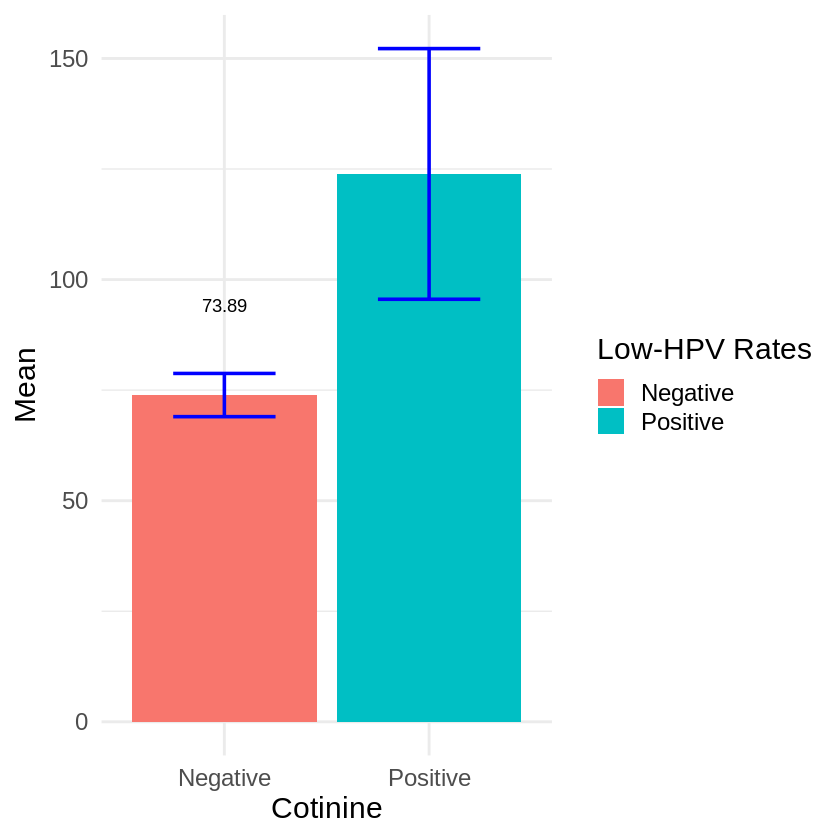

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Cotinine", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)







The bar plot above shows the means of the negative and positive values for low HPV. 


## **Urinary Arsenous Acid(ug/L)**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(URXUAS3, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$URXUAS3 = as.numeric(HSV_df_to_use$URXUAS3)

t.test(URXUAS3 ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  URXUAS3 by high.HPV
t = 0.99997, df = 725.91, p-value = 0.3177
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.02737115  0.08419977
sample estimates:
mean in group Negative mean in group Positive 
             0.5887437              0.5603294 



For the t-test above, the p-value( ~ 0.65 )is greater than alpha level (0.05). Hence there is no significant difference in the mean **urinary arsenous acid** of the negative (0.48) high HPV and positive (0.50) high HPV.




In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(URXUAS3, na.rm=TRUE), Min = quantile(URXUAS3, 0, na.rm=TRUE), Q1 = quantile(URXUAS3, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUAS3, 0.5, na.rm=TRUE),  Q3 = quantile(URXUAS3, 0.75, na.rm=TRUE), Max = quantile(URXUAS3, 1, na.rm=TRUE),
   Sd = sd(URXUAS3, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(URXUAS3, na.rm=TRUE), Min = quantile(URXUAS3, 0, na.rm=TRUE), Q1 = quantile(URXUAS3, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUAS3, 0.5, na.rm=TRUE),  Q3 = quantile(URXUAS3, 0.75, na.rm=TRUE), Max = quantile(URXUAS3, 1, na.rm=TRUE),
   Sd = sd(URXUAS3, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,1194,0.59,0.08,0.12,0.52,0.84,3.59,0.4913874,0.03
Positive,425,0.56,0.08,0.12,0.51,0.81,5.97,0.5071525,0.05
Total,1619,0.58,0.08,0.12,0.52,0.84,5.97,0.4955744,0.02



From the table above those who tested negative for high HPV are roughly 22 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


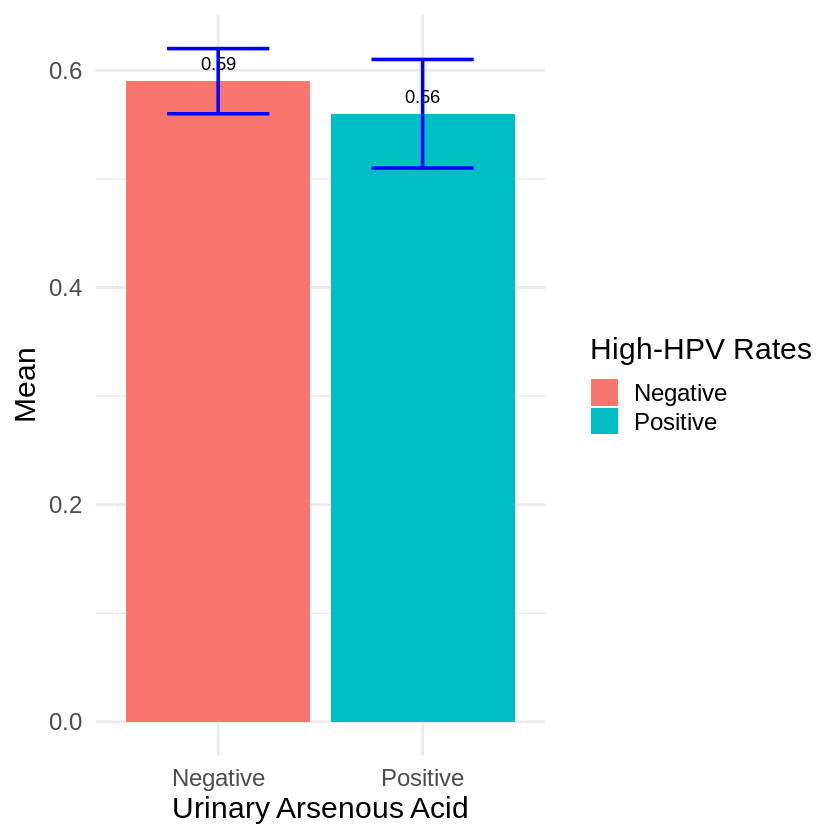

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Urinary Arsenous Acid", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)



The bar plot above shows the means of the negative and positive values for high HPV. 


### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(URXUAS3, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$URXUAS3 = as.numeric(HSV_df_to_use$URXUAS3)

t.test(URXUAS3 ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  URXUAS3 by low.HPV
t = -0.12242, df = 108.41, p-value = 0.9028
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.09887055  0.08736794
sample estimates:
mean in group Negative mean in group Positive 
             0.5809508              0.5867021 



For the t-test above, the p-value(~ 0.45 )is greater than alpha level (0.05). Hence there is no significant difference in the mean **urinary arsenous acid** of the negative (0.48) low HPV and positive (0.56) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(URXUAS3, na.rm=TRUE), Min = quantile(URXUAS3, 0, na.rm=TRUE), Q1 = quantile(URXUAS3, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUAS3, 0.5, na.rm=TRUE),  Q3 = quantile(URXUAS3, 0.75, na.rm=TRUE), Max = quantile(URXUAS3, 1, na.rm=TRUE),
   Sd = sd(URXUAS3, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(URXUAS3, na.rm=TRUE), Min = quantile(URXUAS3, 0, na.rm=TRUE), Q1 = quantile(URXUAS3, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUAS3, 0.5, na.rm=TRUE),  Q3 = quantile(URXUAS3, 0.75, na.rm=TRUE), Max = quantile(URXUAS3, 1, na.rm=TRUE),
   Sd = sd(URXUAS3, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,1525,0.58,0.08,0.08,0.52,0.840,5.97,0.4990153,0.03
Positive,94,0.59,0.08,0.20,0.57,0.855,1.85,0.4383189,0.09
Total,1619,0.58,0.08,0.12,0.52,0.840,5.97,0.4955744,0.02



From the table above those who tested negative for low HPV are roughly 175 times those who tested positive for low HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


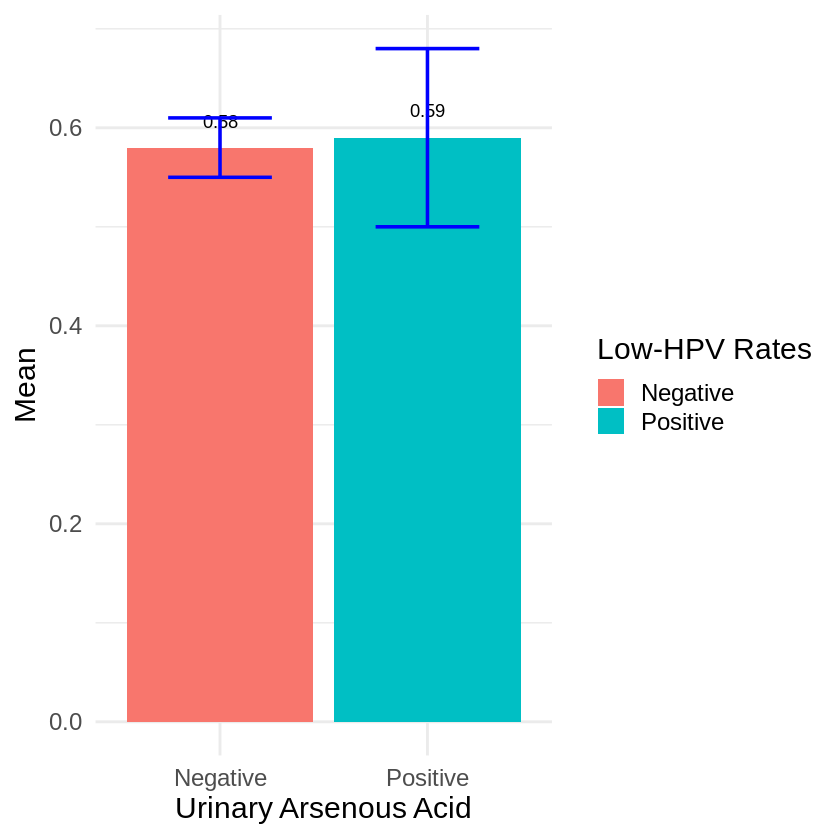

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Urinary Arsenous Acid", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)







The bar plot above shows the means of the negative and positive values for low HPV. 


## **Urinary Arsenic acid(ug/L)**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(URXUAS5, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$URXUAS5 = as.numeric(HSV_df_to_use$URXUAS5)

t.test(URXUAS5 ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  URXUAS5 by high.HPV
t = -1.0959, df = 461.14, p-value = 0.2737
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.05723816  0.01625441
sample estimates:
mean in group Negative mean in group Positive 
             0.5763317              0.5968235 



For the t-test above, the p-value( ~0.38 )is greater than alpha level (0.05). Hence there is no significant difference in the mean **urinary arsenic acid** of the negative (0.58) high HPV and positive (0.59) high HPV.




In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(URXUAS5, na.rm=TRUE), Min = quantile(URXUAS5, 0, na.rm=TRUE), Q1 = quantile(URXUAS5, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUAS5, 0.5, na.rm=TRUE),  Q3 = quantile(URXUAS5, 0.75, na.rm=TRUE), Max = quantile(URXUAS5, 1, na.rm=TRUE),
   Sd = sd(URXUAS5, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(URXUAS5, na.rm=TRUE), Min = quantile(URXUAS5, 0, na.rm=TRUE), Q1 = quantile(URXUAS5, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUAS5, 0.5, na.rm=TRUE),  Q3 = quantile(URXUAS5, 0.75, na.rm=TRUE), Max = quantile(URXUAS5, 1, na.rm=TRUE),
   Sd = sd(URXUAS5, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,1194,0.58,0.56,0.56,0.56,0.56,3.03,0.1315213,0.01
Positive,425,0.60,0.56,0.56,0.56,0.56,8.02,0.3774243,0.04
Total,1619,0.58,0.56,0.56,0.56,0.56,8.02,0.2239746,0.01




From the table above, the total sample was 9065. Of which 8748  tested negative for high HPV, 317 tested positive for high HPV. 


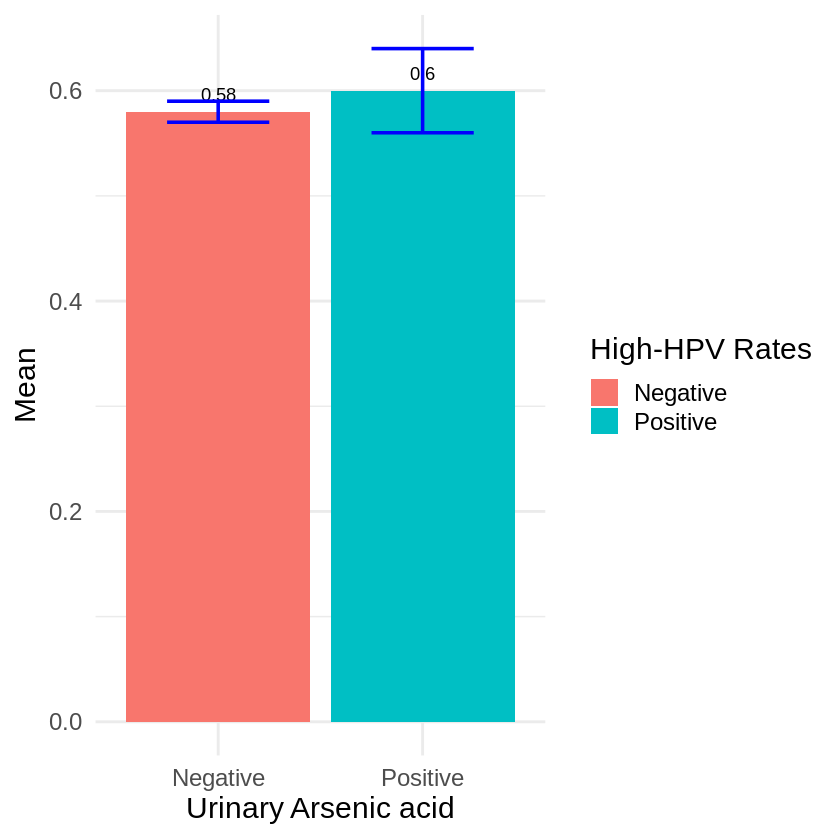

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Urinary Arsenic acid", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)



The bar plot above shows the means of the negative and positive values for high HPV. 


### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(URXUAS5, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$URXUAS5 = as.numeric(HSV_df_to_use$URXUAS5)

t.test(URXUAS5 ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  URXUAS5 by low.HPV
t = 1.0626, df = 209.73, p-value = 0.2892
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.009184523  0.030661887
sample estimates:
mean in group Negative mean in group Positive 
             0.5823344              0.5715957 



For the t-test above, the p-value( ~0.68 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **urinary arsenic acid** of the negative (0.58) low HPV and positive (0.59) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(URXUAS5, na.rm=TRUE), Min = quantile(URXUAS5, 0, na.rm=TRUE), Q1 = quantile(URXUAS5, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUAS5, 0.5, na.rm=TRUE),  Q3 = quantile(URXUAS5, 0.75, na.rm=TRUE), Max = quantile(URXUAS5, 1, na.rm=TRUE),
   Sd = sd(URXUAS5, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(URXUAS5, na.rm=TRUE), Min = quantile(URXUAS5, 0, na.rm=TRUE), Q1 = quantile(URXUAS5, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUAS5, 0.5, na.rm=TRUE),  Q3 = quantile(URXUAS5, 0.75, na.rm=TRUE), Max = quantile(URXUAS5, 1, na.rm=TRUE),
   Sd = sd(URXUAS5, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,1525,0.58,0.56,0.56,0.56,0.56,8.02,0.22992394,0.01
Positive,94,0.57,0.56,0.56,0.56,0.56,1.17,0.07964036,0.02
Total,1619,0.58,0.56,0.56,0.56,0.56,8.02,0.22397460,0.01


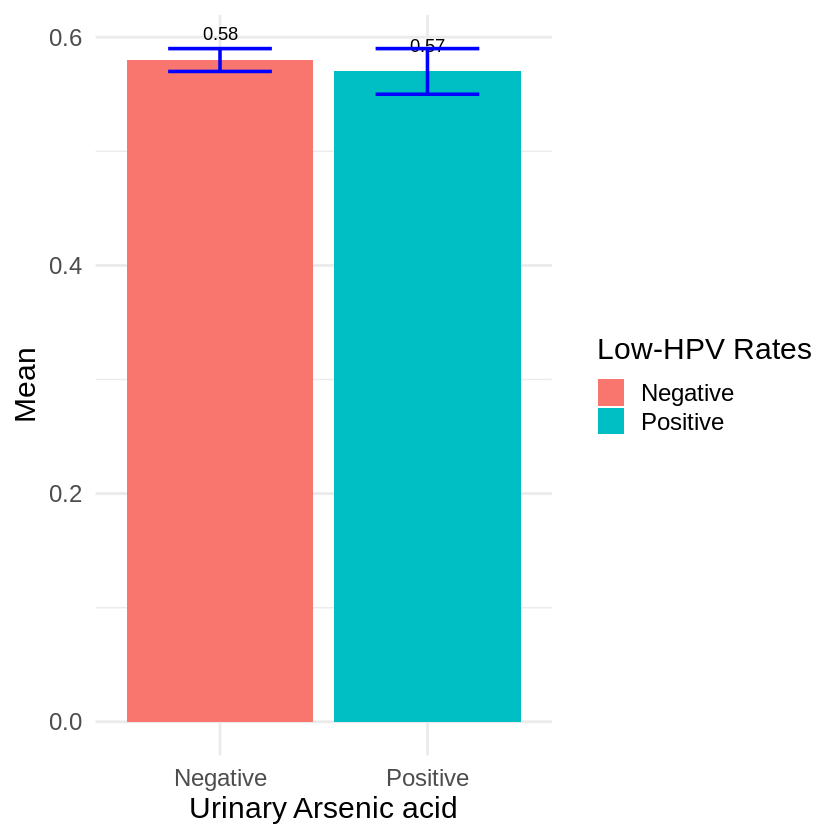

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Urinary Arsenic acid", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)






The bar plot above shows the means of the negative and positive values for low HPV. 

## **Urinary Arsenobetaine(ug/L)**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(URXUAB, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$URXUAB = as.numeric(HSV_df_to_use$URXUAB)

t.test(URXUAB ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  URXUAB by high.HPV
t = 0.7235, df = 1022.8, p-value = 0.4695
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -1.719563  3.728136
sample estimates:
mean in group Negative mean in group Positive 
              8.194263               7.189976 





For the t-test above, the p-value( 0.11 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **urinary arsenobetaine** of the negative (8.09) high HPV and positive (5.59) high HPV.





In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(URXUAB, na.rm=TRUE), Min = quantile(URXUAB, 0, na.rm=TRUE), Q1 = quantile(URXUAB, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUAB, 0.5, na.rm=TRUE),  Q3 = quantile(URXUAB, 0.75, na.rm=TRUE), Max = quantile(URXUAB, 1, na.rm=TRUE),
   Sd = sd(URXUAB, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(URXUAB, na.rm=TRUE), Min = quantile(URXUAB, 0, na.rm=TRUE), Q1 = quantile(URXUAB, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUAB, 0.5, na.rm=TRUE),  Q3 = quantile(URXUAB, 0.75, na.rm=TRUE), Max = quantile(URXUAB, 1, na.rm=TRUE),
   Sd = sd(URXUAB, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,1194,8.19,0.82,0.82,0.82,4.5775,749.00,30.43240,1.73
Positive,425,7.19,0.82,0.82,0.82,4.0800,223.42,22.11892,2.11
Total,1619,7.93,0.82,0.82,0.82,4.4600,749.00,28.48276,1.39



From the table above those who tested negative for high HPV are roughly 27 times those who tested positive for high HPV in number. Also, the distributions are roughly different accross the quantiles and the variance of the two groups are different.


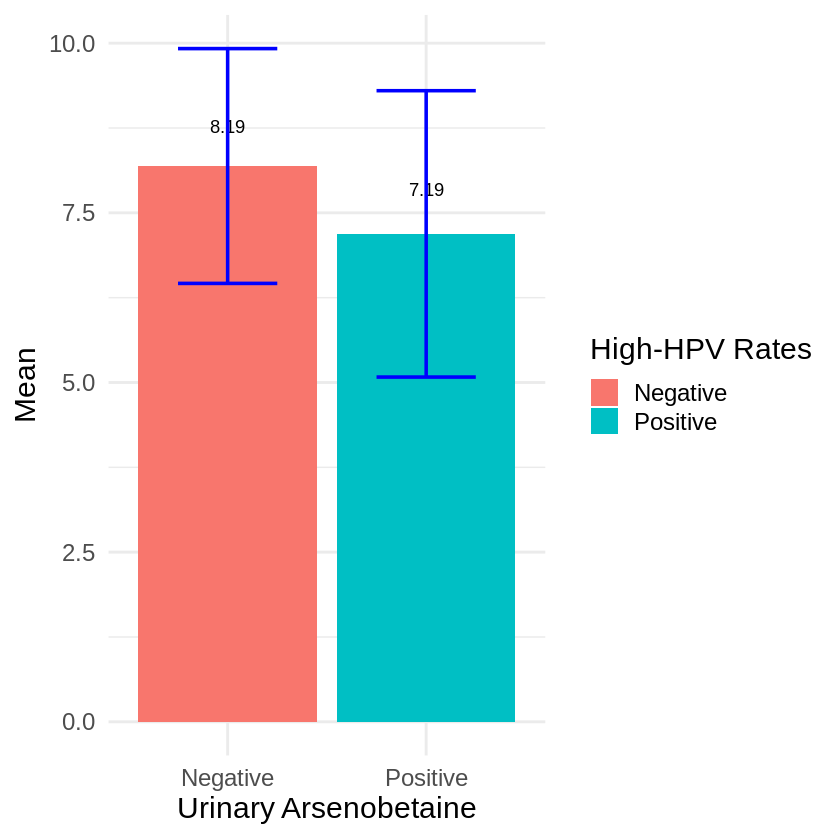

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
   #geom_point( colour = "red", size = 7) +
  labs(x = "Urinary Arsenobetaine", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)


The bar plot above shows the means of the negative and positive values for high HPV. 

### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(URXUAB, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$URXUAB = as.numeric(HSV_df_to_use$URXUAB)

t.test(URXUAB ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  URXUAB by low.HPV
t = -1.2912, df = 104.21, p-value = 0.1995
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -10.126235   2.139527
sample estimates:
mean in group Negative mean in group Positive 
              7.698774              11.692128 





For the t-test above, the p-value( ~0.002 ) is less than alpha level (0.05). Hence there is a significant difference in the mean **urinary arsenobetaine** of the negative (8.01) low HPV and positive (3.0) low HPV.





In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(URXUAB, na.rm=TRUE), Min = quantile(URXUAB, 0, na.rm=TRUE), Q1 = quantile(URXUAB, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUAB, 0.5, na.rm=TRUE),  Q3 = quantile(URXUAB, 0.75, na.rm=TRUE), Max = quantile(URXUAB, 1, na.rm=TRUE),
   Sd = sd(URXUAB, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(URXUAB, na.rm=TRUE), Min = quantile(URXUAB, 0, na.rm=TRUE), Q1 = quantile(URXUAB, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUAB, 0.5, na.rm=TRUE),  Q3 = quantile(URXUAB, 0.75, na.rm=TRUE), Max = quantile(URXUAB, 1, na.rm=TRUE),
   Sd = sd(URXUAB, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,1525,7.70,0.82,0.82,0.82,4.2300,749.00,28.43508,1.43
Positive,94,11.69,0.82,0.82,1.54,10.4325,223.42,29.14237,5.97
Total,1619,7.93,0.82,0.82,0.82,4.4600,749.00,28.48276,1.39



From the table above those who tested negative for low HPV are roughly 175 times those who tested positive for low HPV in number. Also, the distributions are roughly similar accross the quantiles and the variance of the two groups are different.


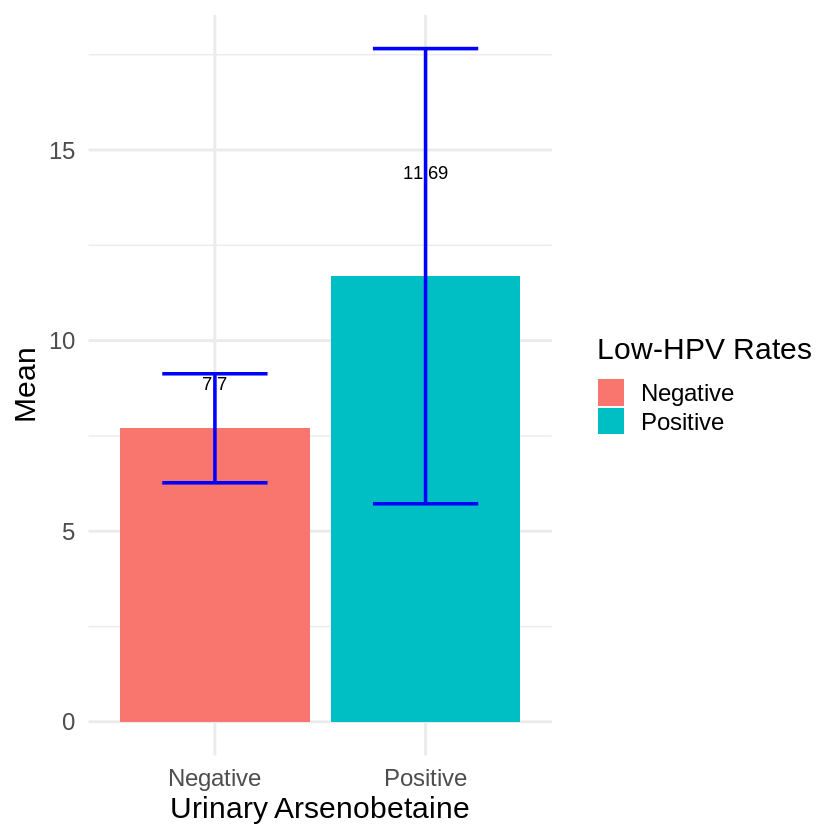

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  #geom_point( colour = "red", size = 7) +
  labs(x = "Urinary Arsenobetaine", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)






The bar plot above shows the means of the negative and positive values for low HPV. 

## **Urinary Arsenocholine(ug/L)**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(URXUAC, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$URXUAC = as.numeric(HSV_df_to_use$URXUAC)

t.test(URXUAC ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  URXUAC by high.HPV
t = 1.9749, df = 1602.3, p-value = 0.04845
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 0.0002117533 0.0618491000
sample estimates:
mean in group Negative mean in group Positive 
             0.1579481              0.1269176 





For the t-test above, the p-value( ~0.0007 ) is less than alpha level (0.05). Hence there is a significant difference in the mean **urinary arsenocholine** of the negative (0.14) high HPV and positive (0.11) high HPV.




In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(URXUAC, na.rm=TRUE), Min = quantile(URXUAC, 0, na.rm=TRUE), Q1 = quantile(URXUAC, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUAC, 0.5, na.rm=TRUE),  Q3 = quantile(URXUAC, 0.75, na.rm=TRUE), Max = quantile(URXUAC, 1, na.rm=TRUE),
   Sd = sd(URXUAC, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(URXUAC, na.rm=TRUE), Min = quantile(URXUAC, 0, na.rm=TRUE), Q1 = quantile(URXUAC, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUAC, 0.5, na.rm=TRUE),  Q3 = quantile(URXUAC, 0.75, na.rm=TRUE), Max = quantile(URXUAC, 1, na.rm=TRUE),
   Sd = sd(URXUAC, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,1194,0.16,0.08,0.08,0.08,0.08,14.3,0.4794556,0.03
Positive,425,0.13,0.08,0.08,0.08,0.08,1.5,0.1519780,0.01
Total,1619,0.15,0.08,0.08,0.08,0.08,14.3,0.4192075,0.02



From the table above those who tested negative for high HPV are roughly 22 times those who tested positive for high HPV in number. Also, the distributions are roughly similar accross the quantiles and the variance of the two groups are different.


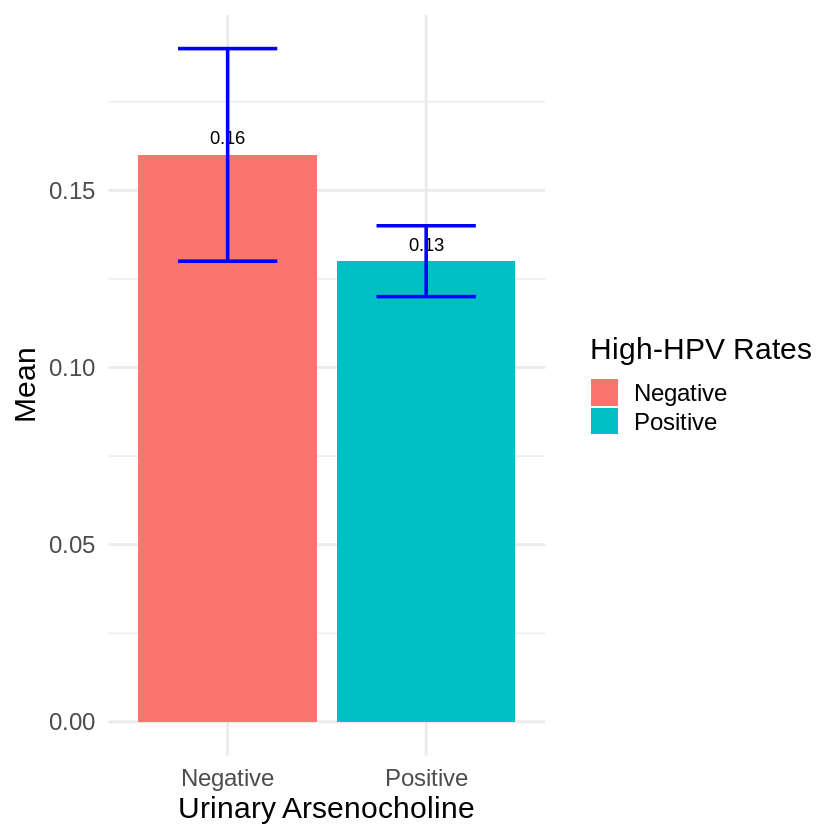

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Urinary Arsenocholine", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)


The bar plot above shows the means of the negative and positive values for high HPV. 

### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(URXUAC, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$URXUAC = as.numeric(HSV_df_to_use$URXUAC)

t.test(URXUAC ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  URXUAC by low.HPV
t = 0.20564, df = 154.23, p-value = 0.8373
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.04096361  0.05048269
sample estimates:
mean in group Negative mean in group Positive 
             0.1500787              0.1453191 





For the t-test above, the p-value( ~0.0002 ) is less than alpha level (0.05). Hence there is a significant difference in the mean **urinary arsenocholine** of the negative (0.15) low HPV and positive (0.09) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(URXUAC, na.rm=TRUE), Min = quantile(URXUAC, 0, na.rm=TRUE), Q1 = quantile(URXUAC, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUAC, 0.5, na.rm=TRUE),  Q3 = quantile(URXUAC, 0.75, na.rm=TRUE), Max = quantile(URXUAC, 1, na.rm=TRUE),
   Sd = sd(URXUAC, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(URXUAC, na.rm=TRUE), Min = quantile(URXUAC, 0, na.rm=TRUE), Q1 = quantile(URXUAC, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUAC, 0.5, na.rm=TRUE),  Q3 = quantile(URXUAC, 0.75, na.rm=TRUE), Max = quantile(URXUAC, 1, na.rm=TRUE),
   Sd = sd(URXUAC, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,1525,0.15,0.08,0.08,0.08,0.08,14.3,0.4291769,0.02
Positive,94,0.15,0.08,0.08,0.08,0.08,1.5,0.1974934,0.04
Total,1619,0.15,0.08,0.08,0.08,0.08,14.3,0.4192075,0.02



From the table above those who tested negative for low HPV are roughly 175 times those who tested positive for low HPV in number. Also, the distributions are roughly similar accross the quantiles and the variance of the two groups are fairly the same.


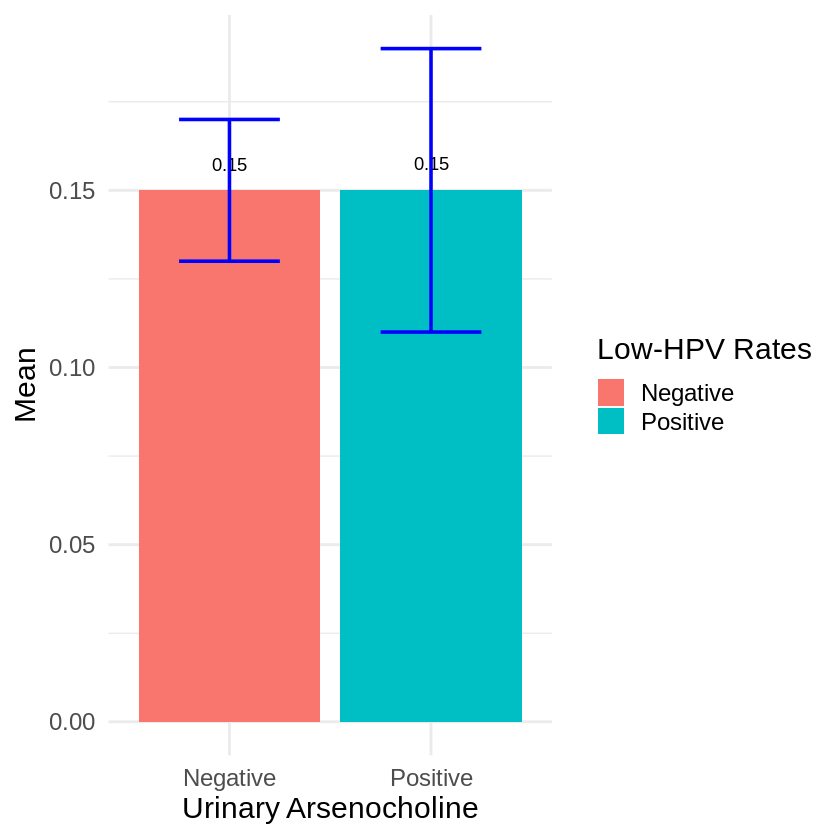

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Urinary Arsenocholine", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)






The bar plot above shows the means of the negative and positive values for low HPV. 

## **Urinary Dimethylarsinic Acid(ug/L)**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(URXUDMA, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$URXUDMA = as.numeric(HSV_df_to_use$URXUDMA)

t.test(URXUDMA ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")





	Welch Two Sample t-test

data:  URXUDMA by high.HPV
t = 0.87375, df = 817.64, p-value = 0.3825
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.3842721  1.0008425
sample estimates:
mean in group Negative mean in group Positive 
              5.422144               5.113859 





For the t-test above, the p-value(~ 0.9 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **urinary dimethylarsinic acid** of the negative (4.98) high HPV and positive (5.01) high HPV.




In [ ]:
high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
summarise(Count = n(), Mean = mean(URXUDMA, na.rm=TRUE), Min = quantile(URXUDMA, 0, na.rm=TRUE), Q1 = quantile(URXUDMA, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUDMA, 0.5, na.rm=TRUE),  Q3 = quantile(URXUDMA, 0.75, na.rm=TRUE), Max = quantile(URXUDMA, 1, na.rm=TRUE),
   Sd = sd(URXUDMA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(URXUDMA, na.rm=TRUE), Min = quantile(URXUDMA, 0, na.rm=TRUE), Q1 = quantile(URXUDMA, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUDMA, 0.5, na.rm=TRUE),  Q3 = quantile(URXUDMA, 0.75, na.rm=TRUE), Max = quantile(URXUDMA, 1, na.rm=TRUE),
   Sd = sd(URXUDMA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var


# cat("\n\n\n")



high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,1194,5.42,1.35,2.0225,3.675,6.365,127.2,6.709829,0.38
Positive,425,5.11,1.35,2.0700,3.460,5.660,65.8,6.073070,0.58
Total,1619,5.34,1.35,2.0300,3.630,6.170,127.2,6.548235,0.32



For the t-test above, the p-value is less than alpha level (0.05). Thus, the data provides enough evidence against the null. Hence there is at least a difference in the means of the negative high HPV and positive high HPV.


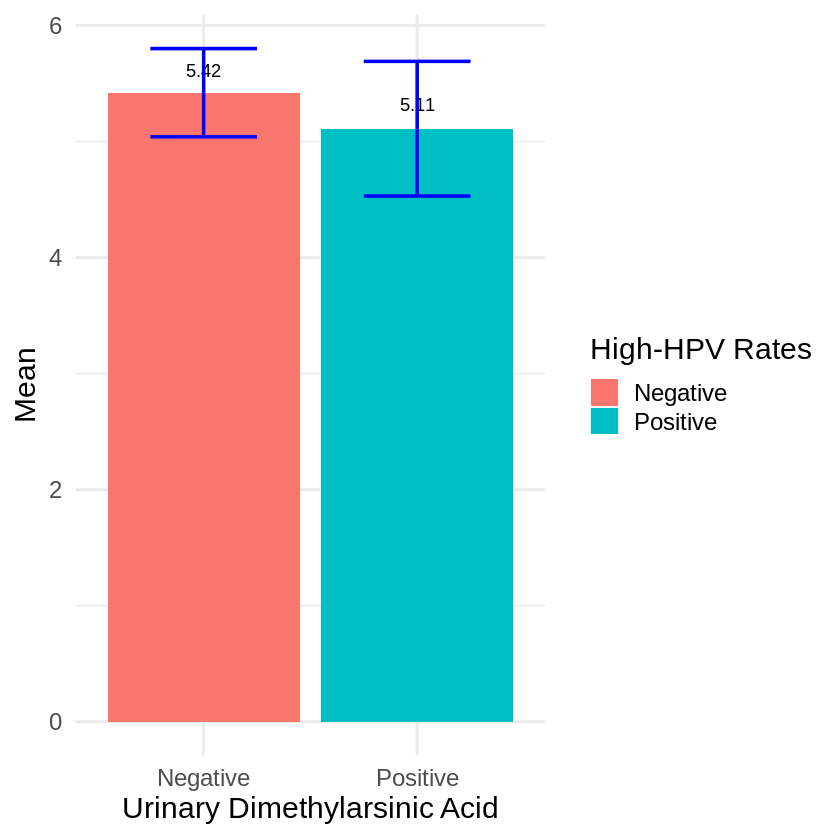

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Urinary Dimethylarsinic Acid", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)



The bar plot above shows the means of the negative and positive values for high HPV. 


### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(URXUDMA, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$URXUDMA = as.numeric(HSV_df_to_use$URXUDMA)

t.test(URXUDMA ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  URXUDMA by low.HPV
t = -0.83015, df = 103.33, p-value = 0.4084
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -2.072804  0.849533
sample estimates:
mean in group Negative mean in group Positive 
              5.305705               5.917340 





For the t-test above, the p-value(~ 0.03 ) is less than alpha level (0.05). Hence there is a significant difference in the mean **urinary dimethylarsinic acid** of the negative (4.99) low HPV and positive (3.57) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(URXUDMA, na.rm=TRUE), Min = quantile(URXUDMA, 0, na.rm=TRUE), Q1 = quantile(URXUDMA, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUDMA, 0.5, na.rm=TRUE),  Q3 = quantile(URXUDMA, 0.75, na.rm=TRUE), Max = quantile(URXUDMA, 1, na.rm=TRUE),
   Sd = sd(URXUDMA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(URXUDMA, na.rm=TRUE), Min = quantile(URXUDMA, 0, na.rm=TRUE), Q1 = quantile(URXUDMA, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUDMA, 0.5, na.rm=TRUE),  Q3 = quantile(URXUDMA, 0.75, na.rm=TRUE), Max = quantile(URXUDMA, 1, na.rm=TRUE),
   Sd = sd(URXUDMA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,1525,5.31,1.35,2.04,3.640,6.1500,127.20,6.522931,0.33
Positive,94,5.92,1.35,2.02,3.605,6.5475,38.38,6.957326,1.42
Total,1619,5.34,1.35,2.03,3.630,6.1700,127.20,6.548235,0.32



From the table above those who tested negative for low HPV are roughly 175 times those who tested positive for high low in number. Also, the distributions are roughly different accross the quantiles and the variance of the two groups are different.


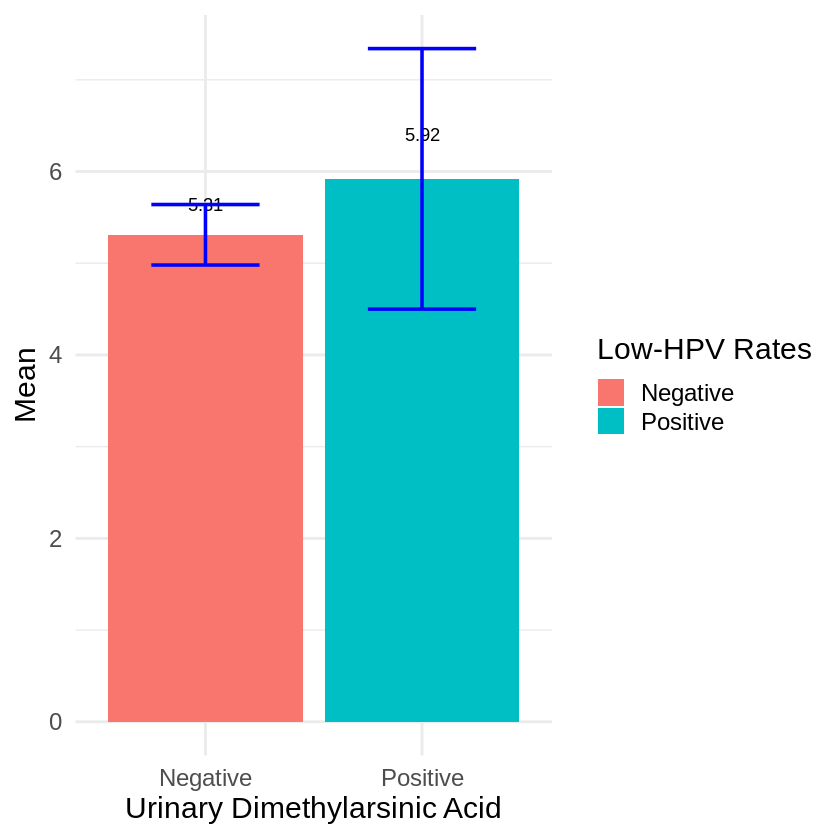

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Urinary Dimethylarsinic Acid", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)






The bar plot above shows the means of the negative and positive values for low HPV. 

## **Urinary Monomethylarsonic Acid(ug/L)**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(URXUMMA, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$URXUMMA = as.numeric(HSV_df_to_use$URXUMMA)

t.test(URXUMMA ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  URXUMMA by high.HPV
t = 1.0734, df = 757.85, p-value = 0.2834
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.03142941  0.10727440
sample estimates:
mean in group Negative mean in group Positive 
             0.7065578              0.6686353 





For the t-test above, the p-value( ~ 0.13 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **urinary monomethylarsonic acid** of the negative (0.61) high HPV and positive (0.69) high HPV.




In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(URXUMMA, na.rm=TRUE), Min = quantile(URXUMMA, 0, na.rm=TRUE), Q1 = quantile(URXUMMA, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUMMA, 0.5, na.rm=TRUE),  Q3 = quantile(URXUMMA, 0.75, na.rm=TRUE), Max = quantile(URXUMMA, 1, na.rm=TRUE),
   Sd = sd(URXUMMA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(URXUMMA, na.rm=TRUE), Min = quantile(URXUMMA, 0, na.rm=TRUE), Q1 = quantile(URXUMMA, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUMMA, 0.5, na.rm=TRUE),  Q3 = quantile(URXUMMA, 0.75, na.rm=TRUE), Max = quantile(URXUMMA, 1, na.rm=TRUE),
   Sd = sd(URXUMMA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,1194,0.71,0.14,0.14,0.56,0.980,6.11,0.6336919,0.04
Positive,425,0.67,0.14,0.14,0.52,0.850,5.39,0.6224836,0.06
Total,1619,0.70,0.14,0.14,0.56,0.965,6.11,0.6307981,0.03



From the table above those who tested negative for high HPV are roughly 22 times those who tested positive for high HPV in number. Also, the distributions are roughly similar accross the quantiles and the variance of the two groups are roughly similar.


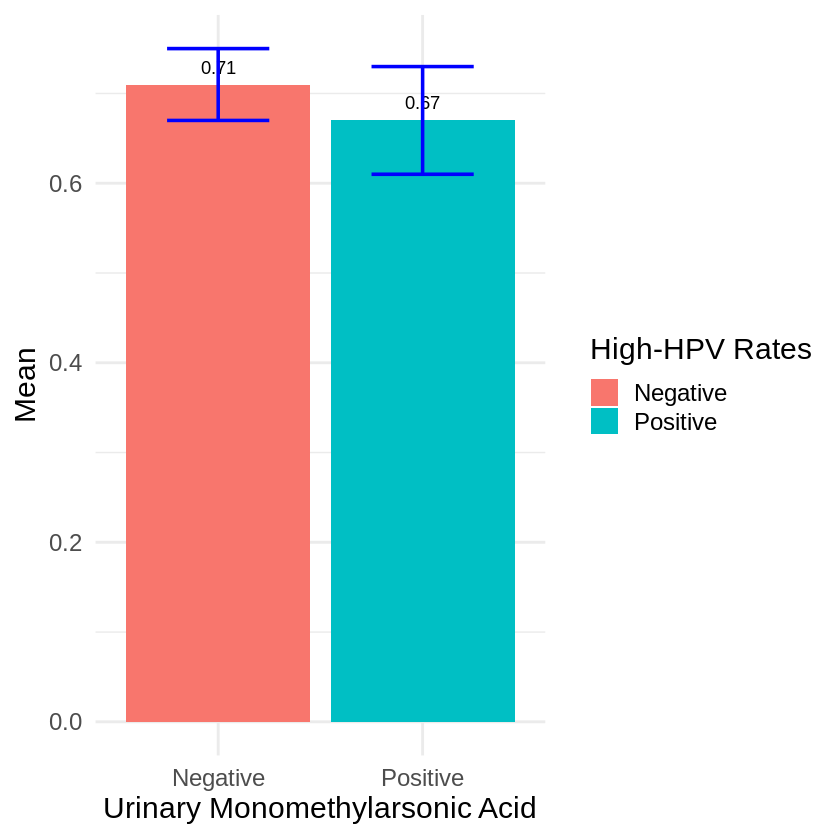

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Urinary Monomethylarsonic Acid", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)



The bar plot above shows the means of the negative and positive values for high HPV. 


### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(URXUMMA, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$URXUMMA = as.numeric(HSV_df_to_use$URXUMMA)

t.test(URXUMMA ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  URXUMMA by low.HPV
t = 0.11455, df = 110.8, p-value = 0.909
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.1050500  0.1179402
sample estimates:
mean in group Negative mean in group Positive 
             0.6969770              0.6905319 





For the t-test above, the p-value(~ 0.97 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **urinary monomethylarsonic acid** of the negative (0.62) low HPV and positive (0.62) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(URXUMMA, na.rm=TRUE), Min = quantile(URXUMMA, 0, na.rm=TRUE), Q1 = quantile(URXUMMA, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUMMA, 0.5, na.rm=TRUE),  Q3 = quantile(URXUMMA, 0.75, na.rm=TRUE), Max = quantile(URXUMMA, 1, na.rm=TRUE),
   Sd = sd(URXUMMA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(URXUMMA, na.rm=TRUE), Min = quantile(URXUMMA, 0, na.rm=TRUE), Q1 = quantile(URXUMMA, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUMMA, 0.5, na.rm=TRUE),  Q3 = quantile(URXUMMA, 0.75, na.rm=TRUE), Max = quantile(URXUMMA, 1, na.rm=TRUE),
   Sd = sd(URXUMMA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,1525,0.70,0.14,0.14,0.55,0.960,6.11,0.6370350,0.03
Positive,94,0.69,0.14,0.14,0.63,0.970,2.56,0.5220789,0.11
Total,1619,0.70,0.14,0.14,0.56,0.965,6.11,0.6307981,0.03



From the table above those who tested negative for high HPV are roughly 175 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


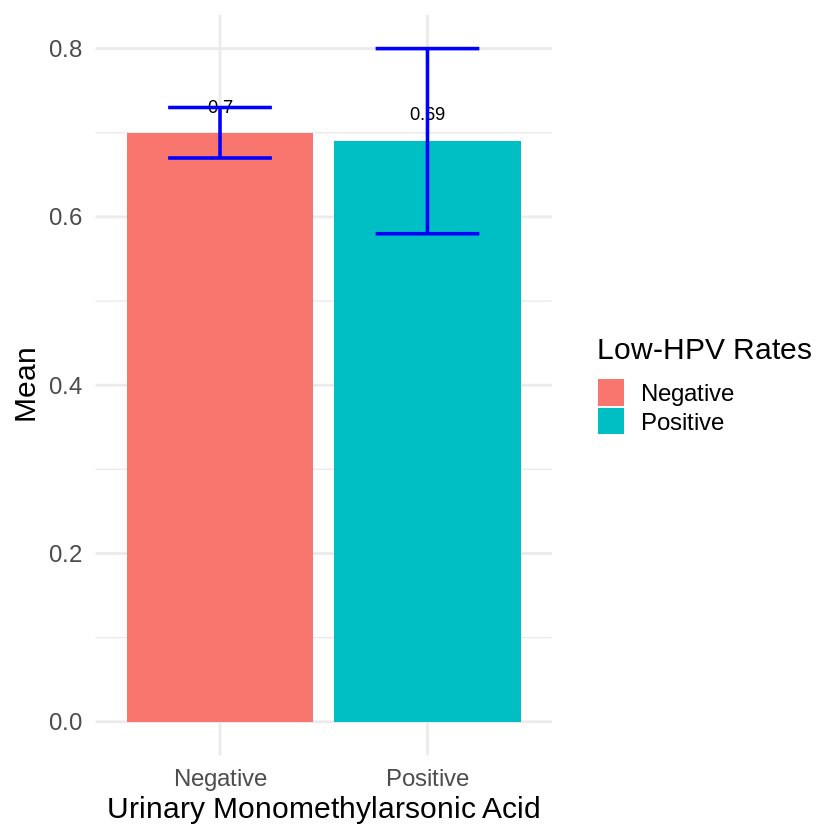

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Urinary Monomethylarsonic Acid", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)







The bar plot above shows the means of the negative and positive values for low HPV. 


## **Urinary Arsenous Acid(ug/L)**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(ln.URXUAS3, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$ln.URXUAS3 = as.numeric(HSV_df_to_use$ln.URXUAS3)

t.test(ln.URXUAS3 ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  ln.URXUAS3 by high.HPV
t = 0.77958, df = 757.8, p-value = 0.4359
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.06829033  0.15825646
sample estimates:
mean in group Negative mean in group Positive 
            -0.9613722             -1.0063553 





For the t-test above, the p-value(~ 0.34 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **urinary arsenous acid** of the negative (-1.22) high HPV and positive (-1.14) high HPV.




In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(ln.URXUAS3, na.rm=TRUE), Min = quantile(ln.URXUAS3, 0, na.rm=TRUE), Q1 = quantile(ln.URXUAS3, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUAS3, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUAS3, 0.75, na.rm=TRUE), Max = quantile(ln.URXUAS3, 1, na.rm=TRUE),
   Sd = sd(ln.URXUAS3, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(ln.URXUAS3, na.rm=TRUE), Min = quantile(ln.URXUAS3, 0, na.rm=TRUE), Q1 = quantile(ln.URXUAS3, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUAS3, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUAS3, 0.75, na.rm=TRUE), Max = quantile(ln.URXUAS3, 1, na.rm=TRUE),
   Sd = sd(ln.URXUAS3, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,1194,-0.96,-2.525729,-2.120264,-0.6539265,-0.1743534,1.278152,1.034952,0.06
Positive,425,-1.01,-2.525729,-2.120264,-0.6733446,-0.2107210,1.786747,1.016735,0.10
Total,1619,-0.97,-2.525729,-2.120264,-0.6539265,-0.1743534,1.786747,1.030078,0.05



From the table above those who tested negative for high HPV are roughly 22 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


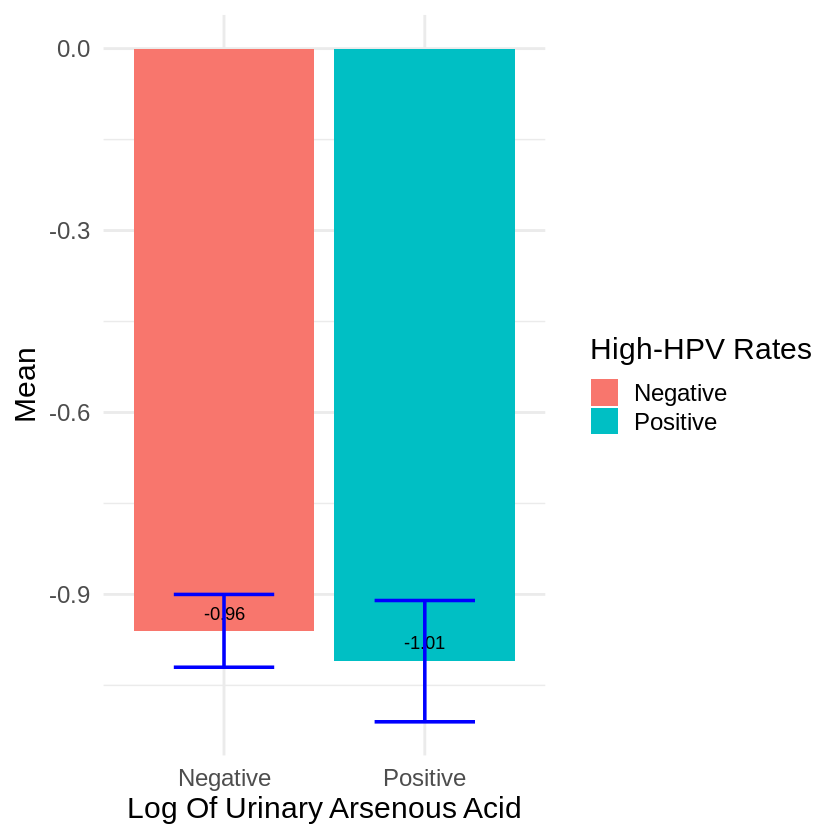

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Log Of Urinary Arsenous Acid", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)



The bar plot above shows the means of the negative and positive values for high HPV. 


### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(ln.URXUAS3, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$ln.URXUAS3 = as.numeric(HSV_df_to_use$ln.URXUAS3)

t.test(ln.URXUAS3 ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  ln.URXUAS3 by low.HPV
t = -0.62645, df = 106.07, p-value = 0.5324
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.2733456  0.1420813
sample estimates:
mean in group Negative mean in group Positive 
            -0.9769913             -0.9113591 





For the t-test above, the p-value(~ 0.29 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **urinary arsenous acid** of the negative (-1.22) low HPV and positive (-0.98) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(ln.URXUAS3, na.rm=TRUE), Min = quantile(ln.URXUAS3, 0, na.rm=TRUE), Q1 = quantile(ln.URXUAS3, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUAS3, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUAS3, 0.75, na.rm=TRUE), Max = quantile(ln.URXUAS3, 1, na.rm=TRUE),
   Sd = sd(ln.URXUAS3, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(ln.URXUAS3, na.rm=TRUE), Min = quantile(ln.URXUAS3, 0, na.rm=TRUE), Q1 = quantile(ln.URXUAS3, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUAS3, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUAS3, 0.75, na.rm=TRUE), Max = quantile(ln.URXUAS3, 1, na.rm=TRUE),
   Sd = sd(ln.URXUAS3, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,1525,-0.98,-2.525729,-2.525729,-0.6539265,-0.1743534,1.7867469,1.0331055,0.05
Positive,94,-0.91,-2.525729,-1.612967,-0.5622728,-0.1567055,0.6151856,0.9828578,0.20
Total,1619,-0.97,-2.525729,-2.120264,-0.6539265,-0.1743534,1.7867469,1.0300780,0.05



From the table above those who tested negative for high HPV are roughly 175 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


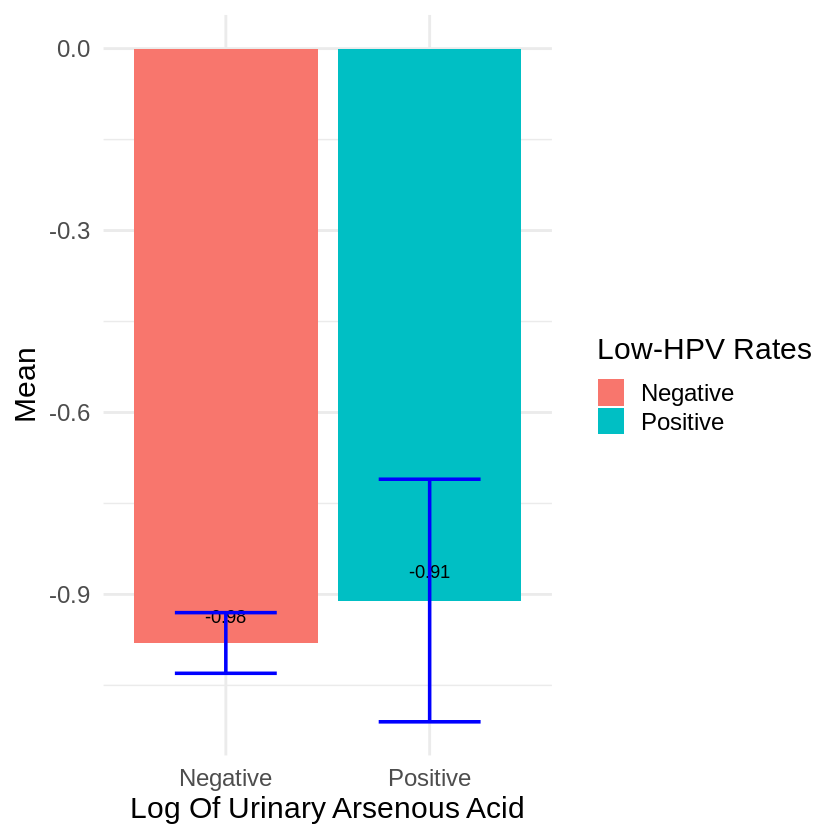

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Log Of Urinary Arsenous Acid", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)







The bar plot above shows the means of the negative and positive values for low HPV. 


## **Urinary Arsenic acid(ug/L)**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(ln.URXUAS5, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$ln.URXUAS5 = as.numeric(HSV_df_to_use$ln.URXUAS5)

t.test(ln.URXUAS5 ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  ln.URXUAS5 by high.HPV
t = -1.2362, df = 566.4, p-value = 0.2169
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.030250659  0.006881185
sample estimates:
mean in group Negative mean in group Positive 
            -0.5619988             -0.5503140 





For the t-test above, the p-value( ~0.34 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **urinary arsenic acid** of the negative (-0.56) high HPV and positive (-0.55) high HPV.




In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(ln.URXUAS5, na.rm=TRUE), Min = quantile(ln.URXUAS5, 0, na.rm=TRUE), Q1 = quantile(ln.URXUAS5, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUAS5, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUAS5, 0.75, na.rm=TRUE), Max = quantile(ln.URXUAS5, 1, na.rm=TRUE),
   Sd = sd(ln.URXUAS5, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(ln.URXUAS5, na.rm=TRUE), Min = quantile(ln.URXUAS5, 0, na.rm=TRUE), Q1 = quantile(ln.URXUAS5, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUAS5, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUAS5, 0.75, na.rm=TRUE), Max = quantile(ln.URXUAS5, 1, na.rm=TRUE),
   Sd = sd(ln.URXUAS5, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,1194,-0.56,-0.5798185,-0.5798185,-0.5798185,-0.5798185,1.108563,0.1216647,0.01
Positive,425,-0.55,-0.5798185,-0.5798185,-0.5798185,-0.5798185,2.081938,0.1808412,0.02
Total,1619,-0.56,-0.5798185,-0.5798185,-0.5798185,-0.5798185,2.081938,0.1396806,0.01



From the table above those who tested negative for high HPV are roughly 22 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


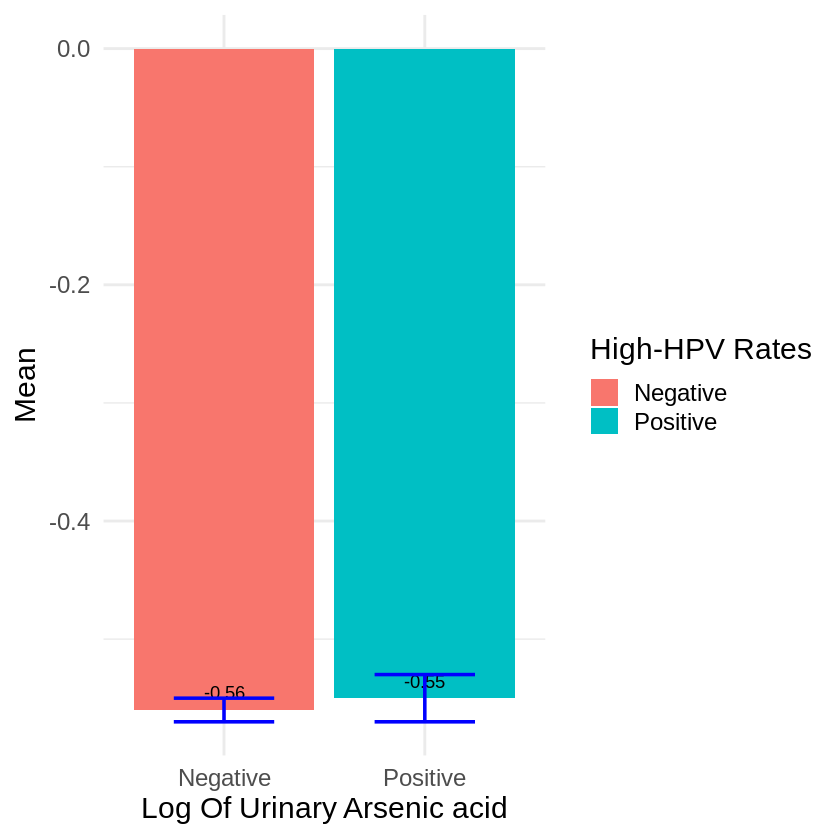

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Log Of Urinary Arsenic acid", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)


The bar plot above shows the means of the negative and positive values for high HPV. 

### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(ln.URXUAS5, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$ln.URXUAS5 = as.numeric(HSV_df_to_use$ln.URXUAS5)

t.test(ln.URXUAS5 ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  ln.URXUAS5 by low.HPV
t = 0.63462, df = 118.05, p-value = 0.5269
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.01454865  0.02827137
sample estimates:
mean in group Negative mean in group Positive 
            -0.5585331             -0.5653944 





For the t-test above, the p-value(~ 0.61 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **urinary arsenic acid** of the negative (-0.56) low HPV and positive (-0.54) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(ln.URXUAS5, na.rm=TRUE), Min = quantile(ln.URXUAS5, 0, na.rm=TRUE), Q1 = quantile(ln.URXUAS5, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUAS5, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUAS5, 0.75, na.rm=TRUE), Max = quantile(ln.URXUAS5, 1, na.rm=TRUE),
   Sd = sd(ln.URXUAS5, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(ln.URXUAS5, na.rm=TRUE), Min = quantile(ln.URXUAS5, 0, na.rm=TRUE), Q1 = quantile(ln.URXUAS5, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUAS5, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUAS5, 0.75, na.rm=TRUE), Max = quantile(ln.URXUAS5, 1, na.rm=TRUE),
   Sd = sd(ln.URXUAS5, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,1525,-0.56,-0.5798185,-0.5798185,-0.5798185,-0.5798185,2.0819384,0.14183258,0.01
Positive,94,-0.57,-0.5798185,-0.5798185,-0.5798185,-0.5798185,0.1570037,0.09873172,0.02
Total,1619,-0.56,-0.5798185,-0.5798185,-0.5798185,-0.5798185,2.0819384,0.13968056,0.01



From the table above those who tested negative for low HPV are roughly 175 times those who tested positive for low HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


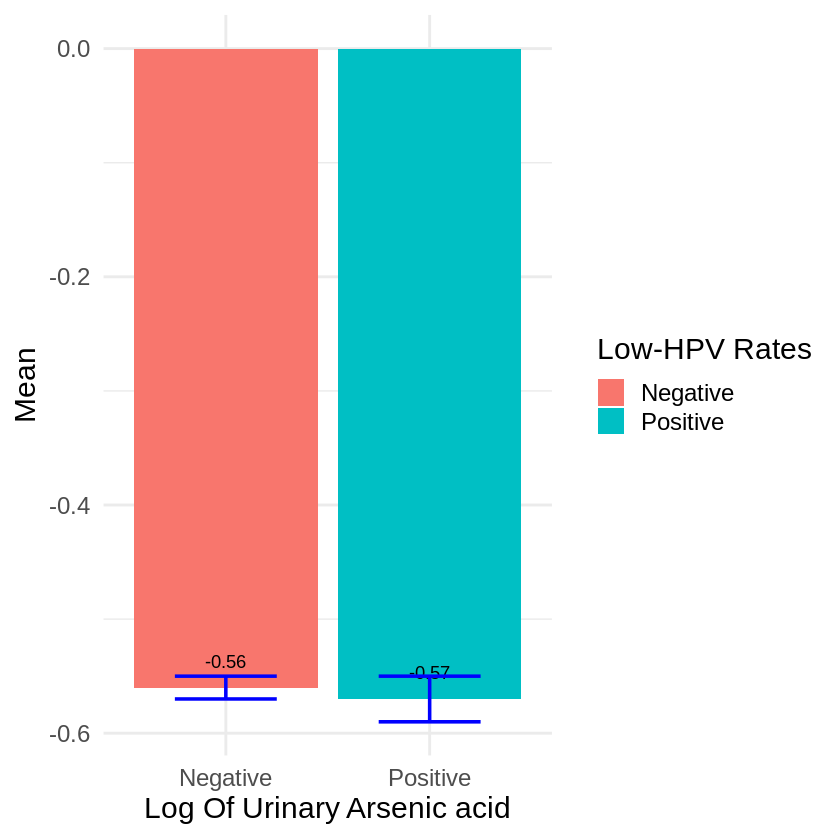

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Log Of Urinary Arsenic acid", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)








The bar plot above shows the means of the negative and positive values for low HPV. 


## **Log Of Urinary Arsenobetaine(ug/L)**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(ln.URXUAB, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$ln.URXUAB = as.numeric(HSV_df_to_use$ln.URXUAB)

t.test(ln.URXUAB ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  ln.URXUAB by high.HPV
t = 1.0419, df = 770.88, p-value = 0.2978
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.06688365  0.21818087
sample estimates:
mean in group Negative mean in group Positive 
             0.7900657              0.7144171 





For the t-test above, the p-value(~ 0.10 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **log of urinary arsenobetaine** of the negative (0.74) high HPV and positive (0.59) high HPV.




In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(ln.URXUAB, na.rm=TRUE), Min = quantile(ln.URXUAB, 0, na.rm=TRUE), Q1 = quantile(ln.URXUAB, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUAB, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUAB, 0.75, na.rm=TRUE), Max = quantile(ln.URXUAB, 1, na.rm=TRUE),
   Sd = sd(ln.URXUAB, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(ln.URXUAB, na.rm=TRUE), Min = quantile(ln.URXUAB, 0, na.rm=TRUE), Q1 = quantile(ln.URXUAB, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUAB, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUAB, 0.75, na.rm=TRUE), Max = quantile(ln.URXUAB, 1, na.rm=TRUE),
   Sd = sd(ln.URXUAB, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,1194,0.79,-0.1984509,-0.1984509,-0.1984509,1.521153,6.618739,1.320417,0.07
Positive,425,0.71,-0.1984509,-0.1984509,-0.1984509,1.406097,5.409053,1.272775,0.12
Total,1619,0.77,-0.1984509,-0.1984509,-0.1984509,1.495139,6.618739,1.308112,0.06



From the table above those who tested negative for low HPV are roughly 22 times those who tested positive for low HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


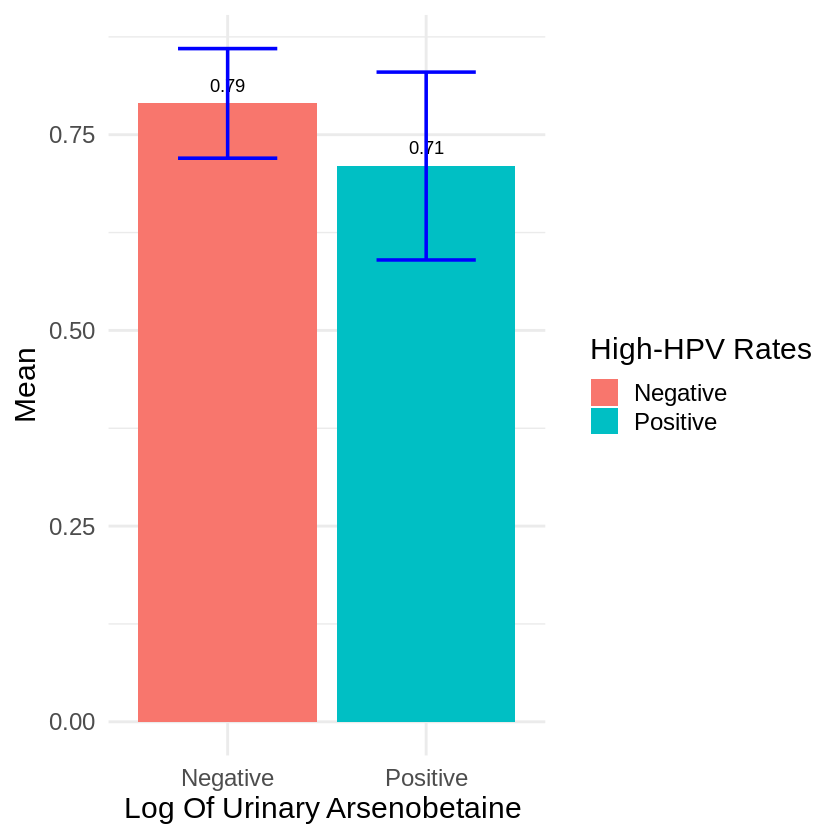

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Log Of Urinary Arsenobetaine ", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)



The bar plot above shows the means of the negative and positive values for high HPV. 


### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(ln.URXUAB, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$ln.URXUAB = as.numeric(HSV_df_to_use$ln.URXUAB)

t.test(ln.URXUAB ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  ln.URXUAB by low.HPV
t = -2.1438, df = 101.48, p-value = 0.03444
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.66044010 -0.02562636
sample estimates:
mean in group Negative mean in group Positive 
             0.7502907              1.0933239 





For the t-test above, the p-value( ~ 0.54 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **log of urinary arsenobetaine** of the negative (0.74) low HPV and positive (0.59) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(ln.URXUAB, na.rm=TRUE), Min = quantile(ln.URXUAB, 0, na.rm=TRUE), Q1 = quantile(ln.URXUAB, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUAB, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUAB, 0.75, na.rm=TRUE), Max = quantile(ln.URXUAB, 1, na.rm=TRUE),
   Sd = sd(ln.URXUAB, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(ln.URXUAB, na.rm=TRUE), Min = quantile(ln.URXUAB, 0, na.rm=TRUE), Q1 = quantile(ln.URXUAB, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUAB, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUAB, 0.75, na.rm=TRUE), Max = quantile(ln.URXUAB, 1, na.rm=TRUE),
   Sd = sd(ln.URXUAB, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,1525,0.75,-0.1984509,-0.1984509,-0.1984509,1.442202,6.618739,1.292002,0.06
Positive,94,1.09,-0.1984509,-0.1984509,0.4312551,2.333093,5.409053,1.517871,0.31
Total,1619,0.77,-0.1984509,-0.1984509,-0.1984509,1.495139,6.618739,1.308112,0.06



From the table above those who tested negative for low HPV are roughly 175 times those who tested positive for low HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


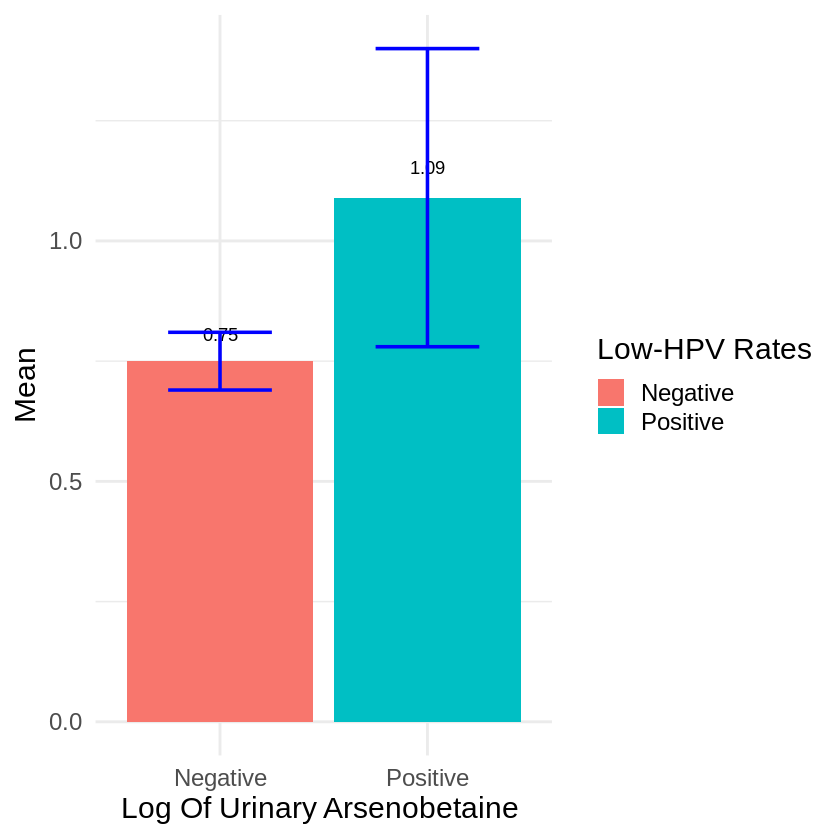

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Log Of Urinary Arsenobetaine ", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)








The bar plot above shows the means of the negative and positive values for low HPV. 


## **Log Of Urinary Arsenocholine(ug/L)**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(ln.URXUAC, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$ln.URXUAC = as.numeric(HSV_df_to_use$ln.URXUAC)

t.test(ln.URXUAC ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  ln.URXUAC by high.HPV
t = 1.6855, df = 863.8, p-value = 0.09226
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.008951571  0.117796700
sample estimates:
mean in group Negative mean in group Positive 
             -2.253368              -2.307791 





For the t-test above, the p-value(~ 0.06 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **log of urinary arsenocholine** of the negative (-2.29) high HPV and positive (-2.35) high HPV.




In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(ln.URXUAC, na.rm=TRUE), Min = quantile(ln.URXUAC, 0, na.rm=TRUE), Q1 = quantile(ln.URXUAC, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUAC, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUAC, 0.75, na.rm=TRUE), Max = quantile(ln.URXUAC, 1, na.rm=TRUE),
   Sd = sd(ln.URXUAC, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(ln.URXUAC, na.rm=TRUE), Min = quantile(ln.URXUAC, 0, na.rm=TRUE), Q1 = quantile(ln.URXUAC, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUAC, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUAC, 0.75, na.rm=TRUE), Max = quantile(ln.URXUAC, 1, na.rm=TRUE),
   Sd = sd(ln.URXUAC, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,1194,-2.25,-2.525729,-2.525729,-2.525729,-2.525729,2.6602595,0.6380850,0.04
Positive,425,-2.31,-2.525729,-2.525729,-2.525729,-2.525729,0.4054651,0.5460519,0.05
Total,1619,-2.27,-2.525729,-2.525729,-2.525729,-2.525729,2.6602595,0.6155617,0.03



From the table above those who tested negative for high HPV are roughly 27 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


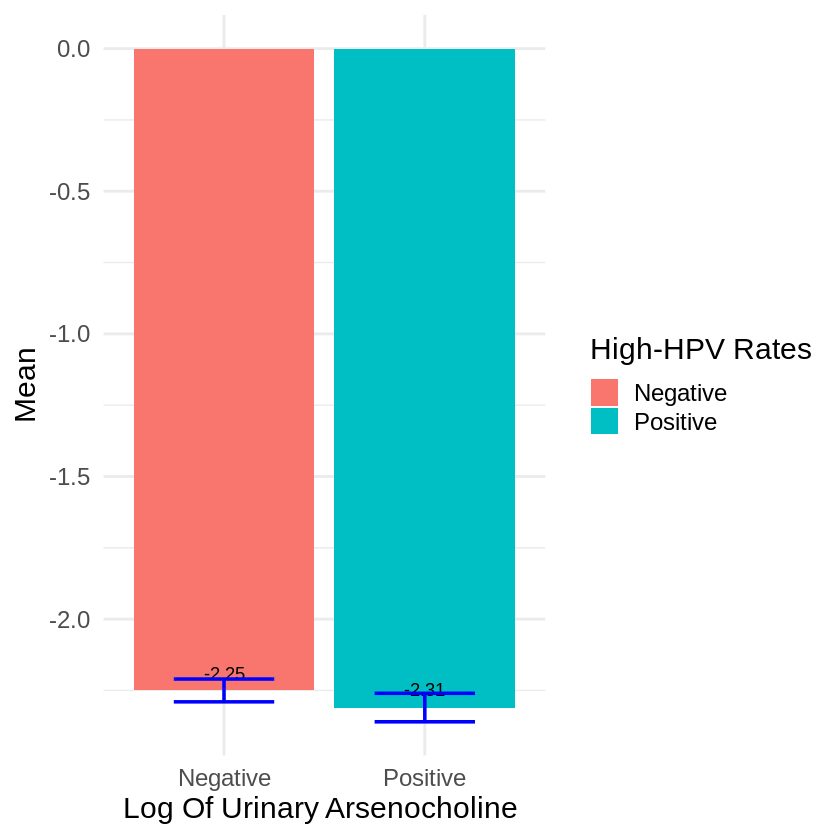

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Log Of Urinary Arsenocholine ", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)



The bar plot above shows the means of the negative and positive values for high HPV. 


### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(ln.URXUAC, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$ln.URXUAC = as.numeric(HSV_df_to_use$ln.URXUAC)

t.test(ln.URXUAC ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  ln.URXUAC by low.HPV
t = -0.39933, df = 104.37, p-value = 0.6905
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.1583760  0.1052806
sample estimates:
mean in group Negative mean in group Positive 
             -2.269196              -2.242648 





For the t-test above, the p-value(~ 0.15 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **log of urinary arsenocholine** of the negative (-2.29) low HPV and positive (-2.40) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(ln.URXUAC, na.rm=TRUE), Min = quantile(ln.URXUAC, 0, na.rm=TRUE), Q1 = quantile(ln.URXUAC, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUAC, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUAC, 0.75, na.rm=TRUE), Max = quantile(ln.URXUAC, 1, na.rm=TRUE),
   Sd = sd(ln.URXUAC, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(ln.URXUAC, na.rm=TRUE), Min = quantile(ln.URXUAC, 0, na.rm=TRUE), Q1 = quantile(ln.URXUAC, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUAC, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUAC, 0.75, na.rm=TRUE), Max = quantile(ln.URXUAC, 1, na.rm=TRUE),
   Sd = sd(ln.URXUAC, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,1525,-2.27,-2.525729,-2.525729,-2.525729,-2.525729,2.6602595,0.6150752,0.03
Positive,94,-2.24,-2.525729,-2.525729,-2.525729,-2.525729,0.4054651,0.6262039,0.13
Total,1619,-2.27,-2.525729,-2.525729,-2.525729,-2.525729,2.6602595,0.6155617,0.03



From the table above those who tested negative for high HPV are roughly 175 times those who tested positive for low HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are different.


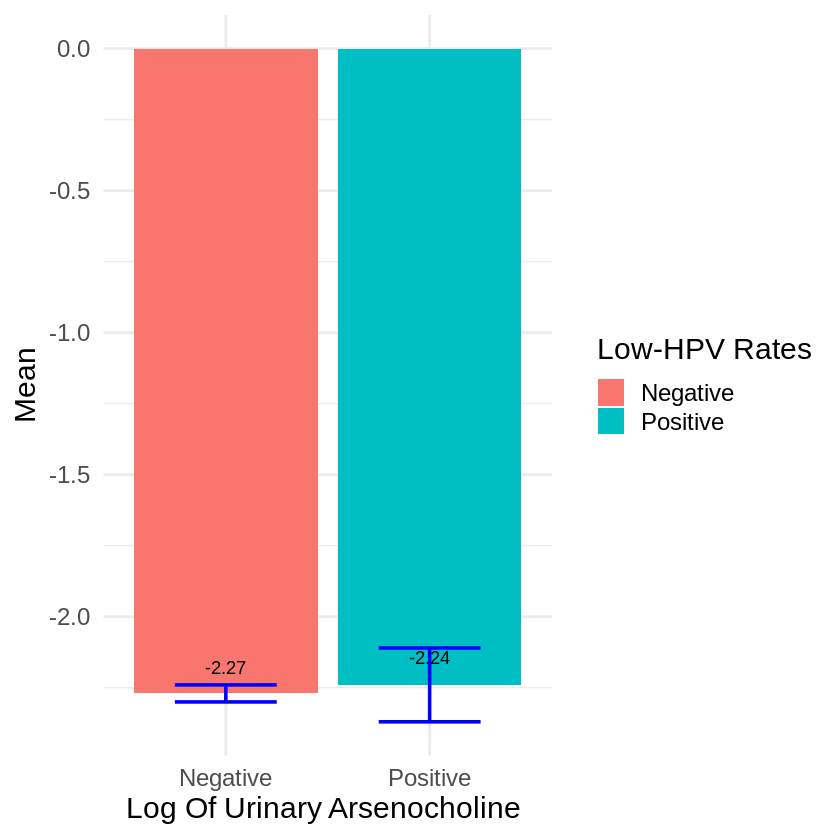

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Log Of Urinary Arsenocholine ", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)








The bar plot above shows the means of the negative and positive values for low HPV. 


## **Log Of Urinary Dimethylarsinic Acid(ug/L)**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(ln.URXUDMA, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$ln.URXUDMA = as.numeric(HSV_df_to_use$ln.URXUDMA)

t.test(ln.URXUDMA ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  ln.URXUDMA by high.HPV
t = 0.99759, df = 770.55, p-value = 0.3188
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.04238802  0.12998589
sample estimates:
mean in group Negative mean in group Positive 
              1.327912               1.284113 





For the t-test above, the p-value( ~0.84 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **log of urinary dimethylarsinic** of the negative (1.25) high HPV and positive (1.2) high HPV.




In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(ln.URXUDMA, na.rm=TRUE), Min = quantile(ln.URXUDMA, 0, na.rm=TRUE), Q1 = quantile(ln.URXUDMA, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUDMA, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUDMA, 0.75, na.rm=TRUE), Max = quantile(ln.URXUDMA, 1, na.rm=TRUE),
   Sd = sd(ln.URXUDMA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(ln.URXUDMA, na.rm=TRUE), Min = quantile(ln.URXUDMA, 0, na.rm=TRUE), Q1 = quantile(ln.URXUDMA, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUDMA, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUDMA, 0.75, na.rm=TRUE), Max = quantile(ln.URXUDMA, 1, na.rm=TRUE),
   Sd = sd(ln.URXUDMA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,1194,1.33,0.3001046,0.7043321,1.301552,1.850813,4.845761,0.7981585,0.05
Positive,425,1.28,0.3001046,0.7275486,1.241269,1.733424,4.186620,0.7697275,0.07
Total,1619,1.32,0.3001046,0.7080358,1.289233,1.819698,4.845761,0.7907930,0.04



From the table above those who tested negative for high HPV are roughly 22 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


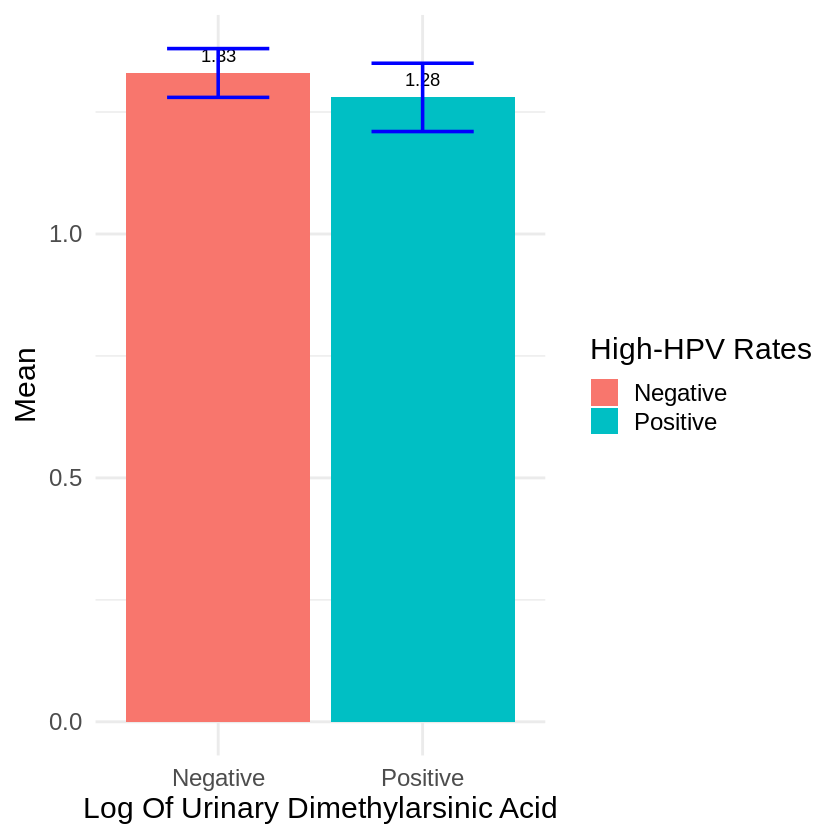

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Log Of Urinary Dimethylarsinic Acid", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)


The bar plot above shows the means of the negative and positive values for high HPV. 

### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(ln.URXUDMA, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$ln.URXUDMA = as.numeric(HSV_df_to_use$ln.URXUDMA)

t.test(ln.URXUDMA ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  ln.URXUDMA by low.HPV
t = -0.42599, df = 102.61, p-value = 0.671
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.2212181  0.1429923
sample estimates:
mean in group Negative mean in group Positive 
              1.314143               1.353256 





For the t-test above, the p-value(~ 0.15 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **log of urinary dimethylarsinic** of the negative (1.25) low HPV and positive (1.04) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(ln.URXUDMA, na.rm=TRUE), Min = quantile(ln.URXUDMA, 0, na.rm=TRUE), Q1 = quantile(ln.URXUDMA, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUDMA, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUDMA, 0.75, na.rm=TRUE), Max = quantile(ln.URXUDMA, 1, na.rm=TRUE),
   Sd = sd(ln.URXUDMA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(ln.URXUDMA, na.rm=TRUE), Min = quantile(ln.URXUDMA, 0, na.rm=TRUE), Q1 = quantile(ln.URXUDMA, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUDMA, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUDMA, 0.75, na.rm=TRUE), Max = quantile(ln.URXUDMA, 1, na.rm=TRUE),
   Sd = sd(ln.URXUDMA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,1525,1.31,0.3001046,0.7129498,1.291984,1.816452,4.845761,0.7860038,0.04
Positive,94,1.35,0.3001046,0.7030975,1.282313,1.878708,3.647536,0.8685447,0.18
Total,1619,1.32,0.3001046,0.7080358,1.289233,1.819698,4.845761,0.7907930,0.04



From the table above those who tested negative for low HPV are roughly 175 times those who tested positive for low HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


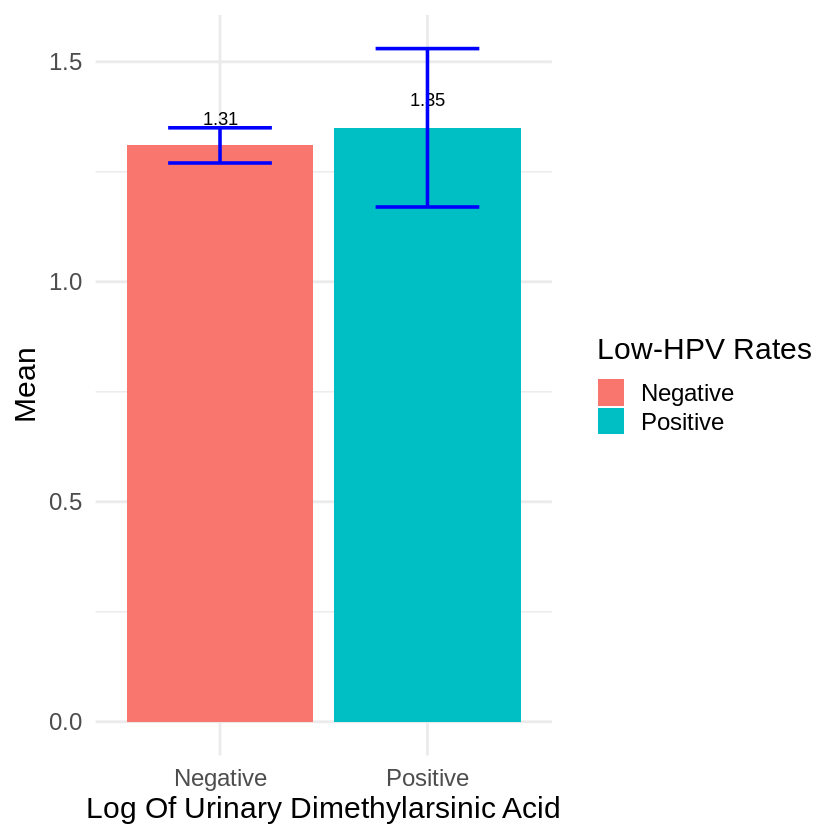

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Log Of Urinary Dimethylarsinic Acid", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)








The bar plot above shows the means of the negative and positive values for low HPV. 




## **Log Of Urinary Monomethylarsonic Acid(ug/L)**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(ln.URXUMMA, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$ln.URXUMMA = as.numeric(HSV_df_to_use$ln.URXUMMA)

t.test(ln.URXUMMA ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  ln.URXUMMA by high.HPV
t = 0.9737, df = 764.02, p-value = 0.3305
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.0495914  0.1472024
sample estimates:
mean in group Negative mean in group Positive 
            -0.7229496             -0.7717551 





For the t-test above, the p-value( ~ 0.02 ) is less than alpha level (0.05). Hence there is a significant difference in the mean **log of urinary monomethylarsonic** of the negative (-0.89) high HPV and positive (-0.73) high HPV.




In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(ln.URXUMMA, na.rm=TRUE), Min = quantile(ln.URXUMMA, 0, na.rm=TRUE), Q1 = quantile(ln.URXUMMA, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUMMA, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUMMA, 0.75, na.rm=TRUE), Max = quantile(ln.URXUMMA, 1, na.rm=TRUE),
   Sd = sd(ln.URXUMMA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(ln.URXUMMA, na.rm=TRUE), Min = quantile(ln.URXUMMA, 0, na.rm=TRUE), Q1 = quantile(ln.URXUMMA, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUMMA, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUMMA, 0.75, na.rm=TRUE), Max = quantile(ln.URXUMMA, 1, na.rm=TRUE),
   Sd = sd(ln.URXUMMA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,1194,-0.72,-1.966113,-1.966113,-0.5798185,-0.02020271,1.809927,0.9050302,0.05
Positive,425,-0.77,-1.966113,-1.966113,-0.6539265,-0.16251893,1.684545,0.8810352,0.08
Total,1619,-0.74,-1.966113,-1.966113,-0.5798185,-0.03564060,1.809927,0.8987792,0.04



From the table above those who tested negative for high HPV are roughly 22 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


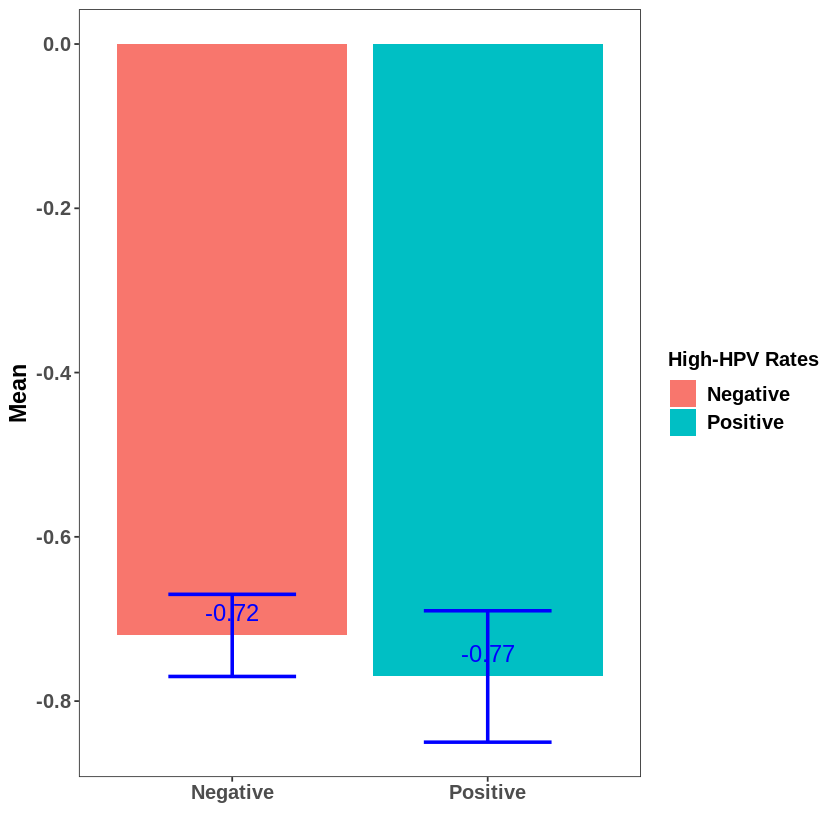

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x ="", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8, color = "blue", size = 5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size = 1)    +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))



The bar plot above shows the means of the negative and positive values for high HPV. 

### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(ln.URXUMMA, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$ln.URXUMMA = as.numeric(HSV_df_to_use$ln.URXUMMA)

t.test(ln.URXUMMA ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  ln.URXUMMA by low.HPV
t = -0.34336, df = 105.15, p-value = 0.732
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.2194166  0.1546409
sample estimates:
mean in group Negative mean in group Positive 
            -0.7376419             -0.7052541 





For the t-test above, the p-value(~ 0.74 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **log of urinary monomethylarsonic** of the negative (-0.89) low HPV and positive (-0.83) high HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(ln.URXUMMA, na.rm=TRUE), Min = quantile(ln.URXUMMA, 0, na.rm=TRUE), Q1 = quantile(ln.URXUMMA, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUMMA, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUMMA, 0.75, na.rm=TRUE), Max = quantile(ln.URXUMMA, 1, na.rm=TRUE),
   Sd = sd(ln.URXUMMA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(ln.URXUMMA, na.rm=TRUE), Min = quantile(ln.URXUMMA, 0, na.rm=TRUE), Q1 = quantile(ln.URXUMMA, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUMMA, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUMMA, 0.75, na.rm=TRUE), Max = quantile(ln.URXUMMA, 1, na.rm=TRUE),
   Sd = sd(ln.URXUMMA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,1525,-0.74,-1.966113,-1.966113,-0.5978370,-0.04082199,1.8099268,0.8997643,0.05
Positive,94,-0.71,-1.966113,-1.966113,-0.4625396,-0.03045921,0.9400073,0.8868261,0.18
Total,1619,-0.74,-1.966113,-1.966113,-0.5798185,-0.03564060,1.8099268,0.8987792,0.04



From the table above those who tested negative for high HPV are roughly 175 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


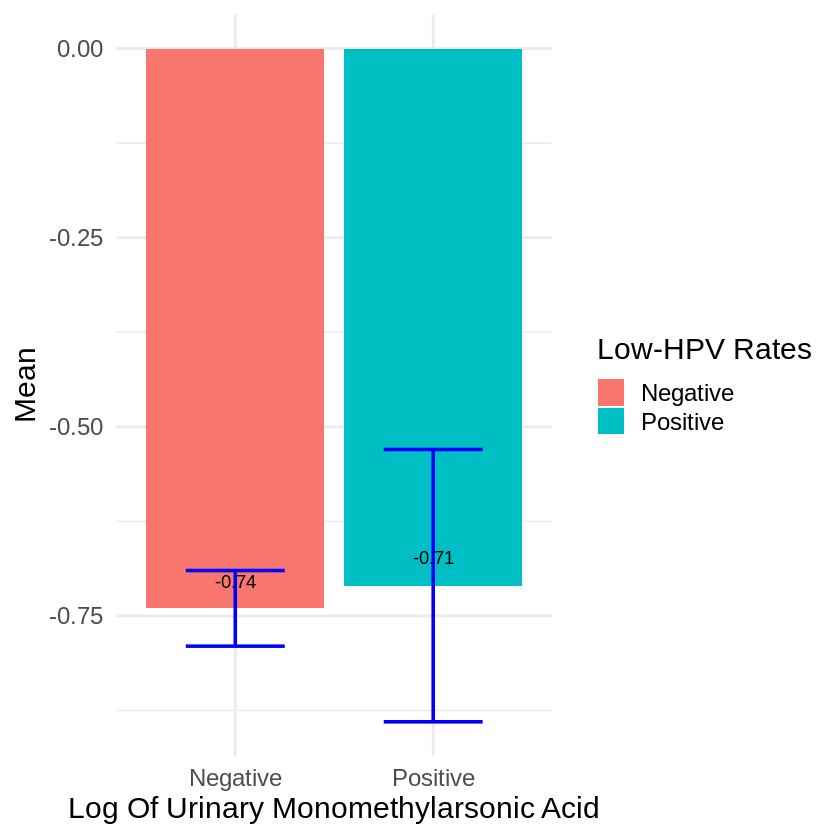

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Log Of Urinary Monomethylarsonic Acid", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)







The bar plot above shows the means of the negative and positive values for high HPV. 

## **Total Urinary Arsenic**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(TUA, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$TUA = as.numeric(HSV_df_to_use$TUA)

t.test(TUA ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")




	Welch Two Sample t-test

data:  TUA by high.HPV
t = 1.2098, df = 995.33, p-value = 0.2267
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -1.278033  5.386979
sample estimates:
mean in group Negative mean in group Positive 
              15.96979               13.91532 





For the t-test above, the p-value( ~ 0.052 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **total urinary arsenic** of the negative (14.88) low HPV and positive (11.38) high HPV.




In [ ]:
high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
summarise(Count = n(), Mean = mean(TUA, na.rm=TRUE), Min = quantile(TUA, 0, na.rm=TRUE), Q1 = quantile(TUA, 0.25, na.rm=TRUE), 
  Q2 = quantile(TUA, 0.5, na.rm=TRUE),  Q3 = quantile(TUA, 0.75, na.rm=TRUE), Max = quantile(TUA, 1, na.rm=TRUE),
   Sd = sd(TUA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(TUA, na.rm=TRUE), Min = quantile(TUA, 0, na.rm=TRUE), Q1 = quantile(TUA, 0.25, na.rm=TRUE), 
  Q2 = quantile(TUA, 0.5, na.rm=TRUE),  Q3 = quantile(TUA, 0.75, na.rm=TRUE), Max = quantile(TUA, 1, na.rm=TRUE),
   Sd = sd(TUA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,1195,15.97,0.90,3.7450,7.35,14.320,849.22,36.66767,2.08
Positive,425,13.92,0.95,3.7600,6.91,13.030,238.19,27.34055,2.61
Total,1620,15.43,0.90,3.7475,7.16,13.905,849.22,34.46960,1.68



From the table above those who tested negative for high HPV are roughly 22 times those who tested positive for high HPV in number. Also, the distributions are roughly similar accross the quantiles and the variance of the two groups are different.


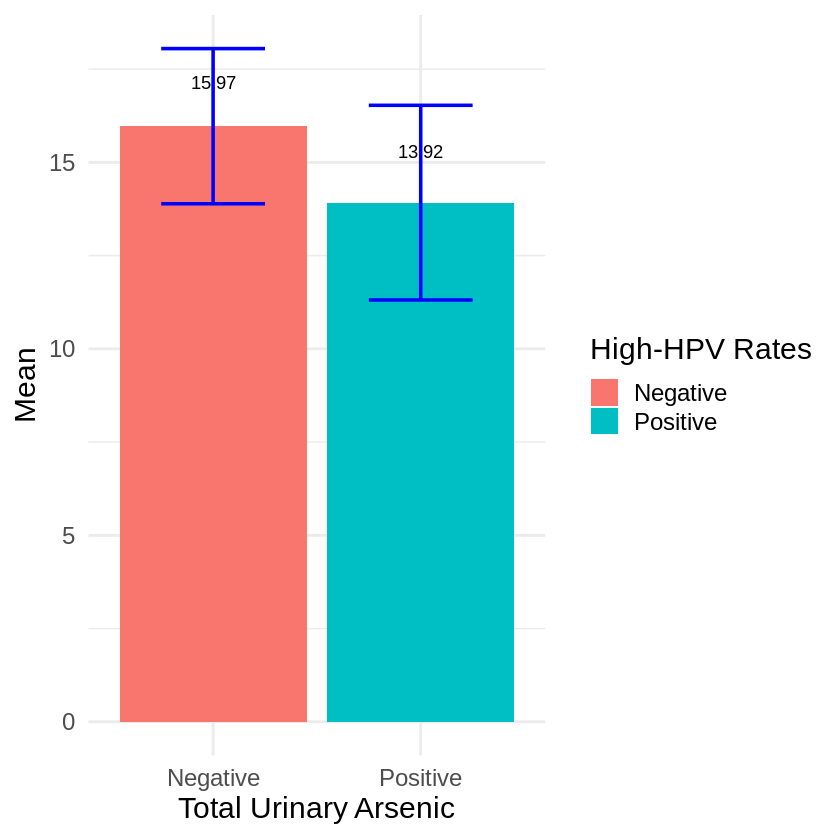

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Total Urinary Arsenic", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)


The bar plot above shows the means of the negative and positive values for high HPV. 

### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(TUA, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$TUA = as.numeric(HSV_df_to_use$TUA)

t.test(TUA ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  TUA by low.HPV
t = -1.2813, df = 105.56, p-value = 0.2029
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -11.630979   2.499331
sample estimates:
mean in group Negative mean in group Positive 
              15.16588               19.73170 





For the t-test above, the p-value(~ 0.0003 ) is less than alpha level (0.05). Hence there is a significant difference in the mean **total urinary arsenic** of the negative (14.88) low HPV and positive (11.38) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(TUA, na.rm=TRUE), Min = quantile(TUA, 0, na.rm=TRUE), Q1 = quantile(TUA, 0.25, na.rm=TRUE), 
  Q2 = quantile(TUA, 0.5, na.rm=TRUE),  Q3 = quantile(TUA, 0.75, na.rm=TRUE), Max = quantile(TUA, 1, na.rm=TRUE),
   Sd = sd(TUA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(TUA, na.rm=TRUE), Min = quantile(TUA, 0, na.rm=TRUE), Q1 = quantile(TUA, 0.25, na.rm=TRUE), 
  Q2 = quantile(TUA, 0.5, na.rm=TRUE),  Q3 = quantile(TUA, 0.75, na.rm=TRUE), Max = quantile(TUA, 1, na.rm=TRUE),
   Sd = sd(TUA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,1526,15.17,0.9,3.7600,7.15,13.6050,849.22,34.52343,1.73
Positive,94,19.73,1.0,3.6400,7.57,17.7025,230.28,33.46920,6.86
Total,1620,15.43,0.9,3.7475,7.16,13.9050,849.22,34.46960,1.68



From the table above those who tested negative for low HPV are roughly 175 times those who tested positive for low HPV in number. Also, the distributions are different accross the quantiles and the variance of the two groups are different.


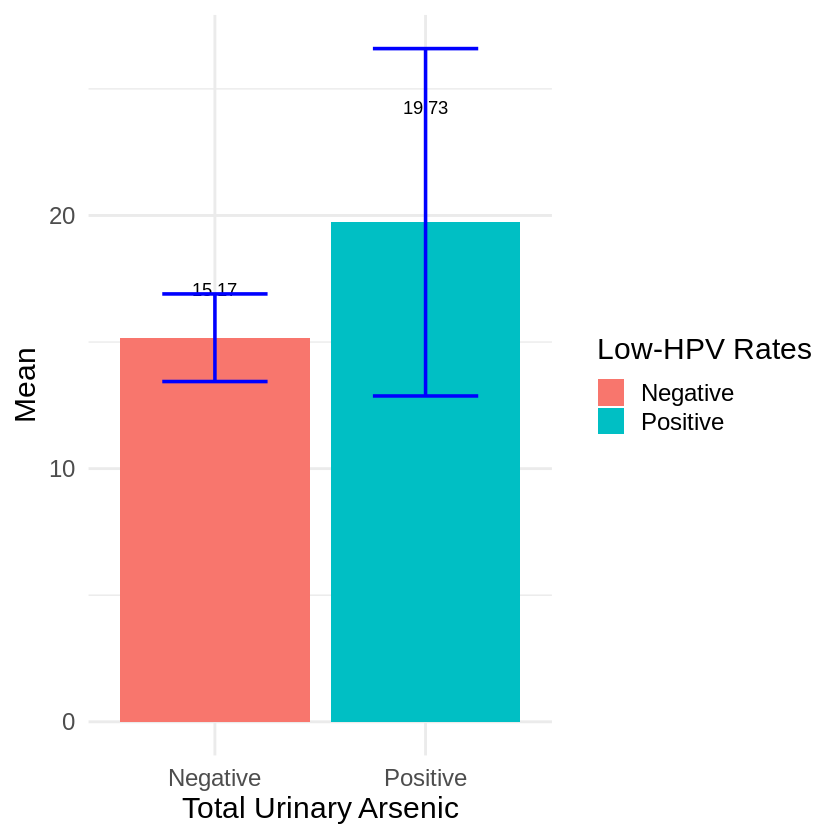

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Total Urinary Arsenic", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)









The bar plot above shows the means of the negative and positive values for low HPV. 


The bar plot above shows the means of the negative and positive values for low HPV. 

## **Total Urinary Arsenic 1(ug/L)**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(TUA1, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$TUA1 = as.numeric(HSV_df_to_use$TUA1)

t.test(TUA1 ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  TUA1 by high.HPV
t = 0.90246, df = 796.54, p-value = 0.3671
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.4161427  1.1244030
sample estimates:
mean in group Negative mean in group Positive 
              7.293777               6.939647 





For the t-test above, the p-value(~ 0.79 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **total urinary arsenic 1** of the negative (6.66) high HPV and positive (6.81) high HPV.




In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(TUA1, na.rm=TRUE), Min = quantile(TUA1, 0, na.rm=TRUE), Q1 = quantile(TUA1, 0.25, na.rm=TRUE), 
  Q2 = quantile(TUA1, 0.5, na.rm=TRUE),  Q3 = quantile(TUA1, 0.75, na.rm=TRUE), Max = quantile(TUA1, 1, na.rm=TRUE),
   Sd = sd(TUA1, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(TUA1, na.rm=TRUE), Min = quantile(TUA1, 0, na.rm=TRUE), Q1 = quantile(TUA1, 0.25, na.rm=TRUE), 
  Q2 = quantile(TUA1, 0.5, na.rm=TRUE),  Q3 = quantile(TUA1, 0.75, na.rm=TRUE), Max = quantile(TUA1, 1, na.rm=TRUE),
   Sd = sd(TUA1, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,1194,7.29,2.13,3.2625,5.38,8.7675,129.02,7.319403,0.42
Positive,425,6.94,2.13,3.3900,5.18,7.9200,76.48,6.809797,0.65
Total,1619,7.20,2.13,3.3100,5.35,8.5150,129.02,7.188740,0.35



From the table above those who tested negative for high HPV are roughly 27 times those who tested positive for high HPV in number. Also, the distributions are different accross the quantiles and the variance of the two groups are different.


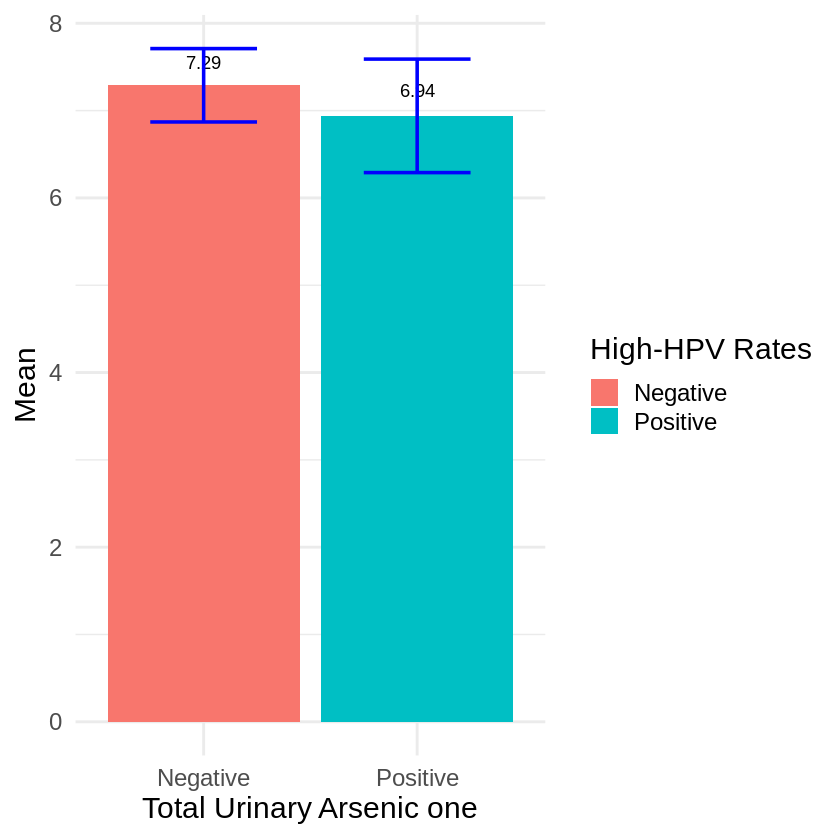

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Total Urinary Arsenic one", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)



The bar plot above shows the means of the negative and positive values for high HPV. 


### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(TUA1, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$TUA1 = as.numeric(HSV_df_to_use$TUA1)

t.test(TUA1 ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  TUA1 by low.HPV
t = -0.75181, df = 103.65, p-value = 0.4539
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -2.1834104  0.9830044
sample estimates:
mean in group Negative mean in group Positive 
              7.165967               7.766170 





For the t-test above, the p-value(~ 0.09 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **total urinary arsenic 1** of the negative (6.68) low HPV and positive (5.34) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(TUA1, na.rm=TRUE), Min = quantile(TUA1, 0, na.rm=TRUE), Q1 = quantile(TUA1, 0.25, na.rm=TRUE), 
  Q2 = quantile(TUA1, 0.5, na.rm=TRUE),  Q3 = quantile(TUA1, 0.75, na.rm=TRUE), Max = quantile(TUA1, 1, na.rm=TRUE),
   Sd = sd(TUA1, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(TUA1, na.rm=TRUE), Min = quantile(TUA1, 0, na.rm=TRUE), Q1 = quantile(TUA1, 0.25, na.rm=TRUE), 
  Q2 = quantile(TUA1, 0.5, na.rm=TRUE),  Q3 = quantile(TUA1, 0.75, na.rm=TRUE), Max = quantile(TUA1, 1, na.rm=TRUE),
   Sd = sd(TUA1, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,1525,7.17,2.13,3.320,5.350,8.510,129.02,7.168111,0.36
Positive,94,7.77,2.13,3.135,5.295,8.740,41.25,7.532858,1.54
Total,1619,7.20,2.13,3.310,5.350,8.515,129.02,7.188740,0.35





From the table above those who tested negative for high HPV are roughly 175 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are different.


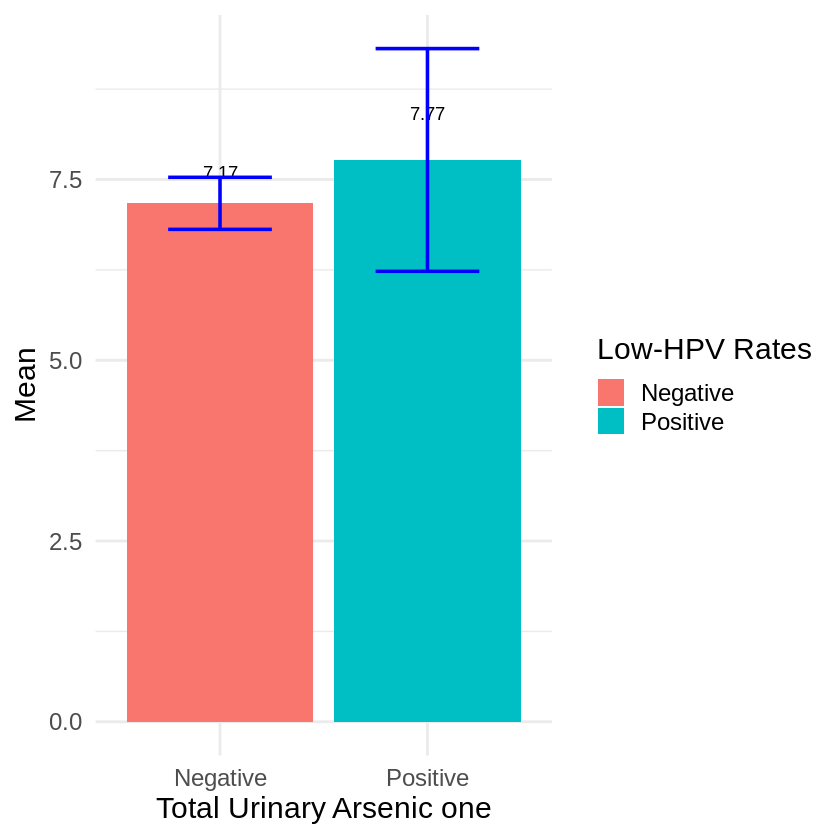

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Total Urinary Arsenic one", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)











The bar plot above shows the means of the negative and positive values for low HPV. 


## **Total Urinary Arsenic 2(ug/L)**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(TUA2, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$TUA2 = as.numeric(HSV_df_to_use$TUA2)

t.test(TUA2 ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  TUA2 by high.HPV
t = 0.94502, df = 763.91, p-value = 0.3449
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.6313818  1.8035665
sample estimates:
mean in group Negative mean in group Positive 
              7.412546               6.826454 





For the t-test above, the p-value(~ 0.64 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **total urinary arsenic 2** of the negative (6.61) high HPV and positive (6.24) high HPV.




In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(TUA2, na.rm=TRUE), Min = quantile(TUA2, 0, na.rm=TRUE), Q1 = quantile(TUA2, 0.25, na.rm=TRUE), 
  Q2 = quantile(TUA2, 0.5, na.rm=TRUE),  Q3 = quantile(TUA2, 0.75, na.rm=TRUE), Max = quantile(TUA2, 1, na.rm=TRUE),
   Sd = sd(TUA2, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(TUA2, na.rm=TRUE), Min = quantile(TUA2, 0, na.rm=TRUE), Q1 = quantile(TUA2, 0.25, na.rm=TRUE), 
  Q2 = quantile(TUA2, 0.5, na.rm=TRUE),  Q3 = quantile(TUA2, 0.75, na.rm=TRUE), Max = quantile(TUA2, 1, na.rm=TRUE),
   Sd = sd(TUA2, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,1190,7.41,0.00,2.280,4.75,8.5225,172.50,11.21991,0.64
Positive,423,6.83,0.05,2.415,4.69,7.7000,143.16,10.86056,1.04
Total,1613,7.26,0.00,2.310,4.74,8.3600,172.50,11.12644,0.54



From the table above those who tested negative for high HPV are roughly 22 times those who tested positive for high HPV in number. Also, the distributions are different accross the quantiles and the variance of the two groups are similar.


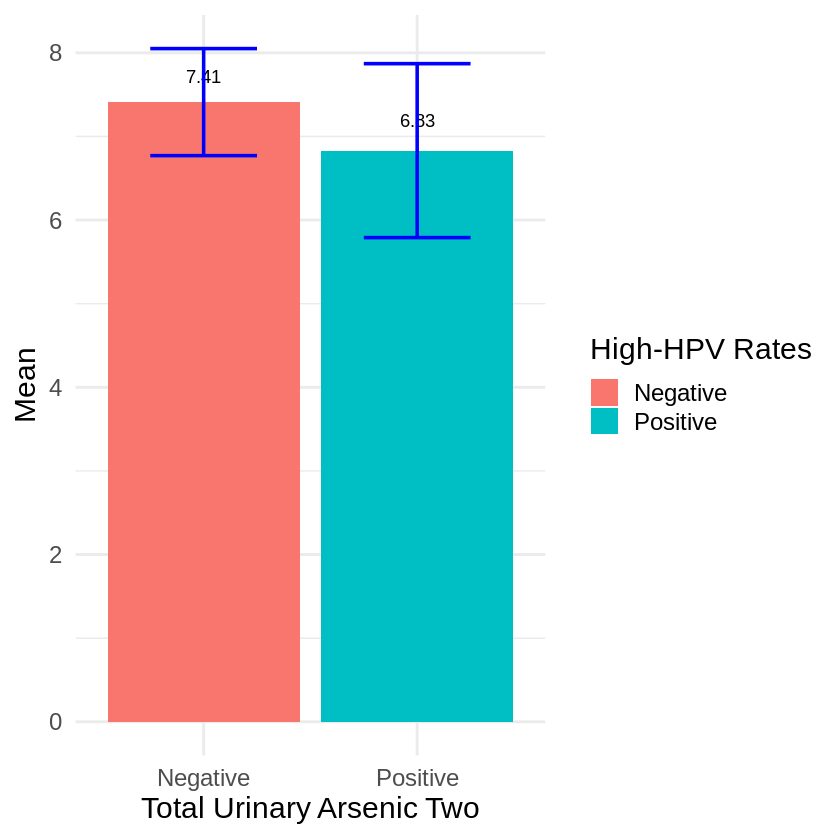

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Total Urinary Arsenic Two", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)


The bar plot above shows the means of the negative and positive values for high HPV. 

### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(TUA2, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$TUA2 = as.numeric(HSV_df_to_use$TUA2)

t.test(TUA2 ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  TUA2 by low.HPV
t = -0.6442, df = 108.74, p-value = 0.5208
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -2.750677  1.401218
sample estimates:
mean in group Negative mean in group Positive 
              7.219526               7.894255 





For the t-test above, the p-value(~ 0.005 ) is less than alpha level (0.05). Hence there is no significant difference in the mean **total urinary arsenic 2** of the negative (6.60) low HPV and positive (4.16) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(TUA2, na.rm=TRUE), Min = quantile(TUA2, 0, na.rm=TRUE), Q1 = quantile(TUA2, 0.25, na.rm=TRUE), 
  Q2 = quantile(TUA2, 0.5, na.rm=TRUE),  Q3 = quantile(TUA2, 0.75, na.rm=TRUE), Max = quantile(TUA2, 1, na.rm=TRUE),
   Sd = sd(TUA2, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(TUA2, na.rm=TRUE), Min = quantile(TUA2, 0, na.rm=TRUE), Q1 = quantile(TUA2, 0.25, na.rm=TRUE), 
  Q2 = quantile(TUA2, 0.5, na.rm=TRUE),  Q3 = quantile(TUA2, 0.75, na.rm=TRUE), Max = quantile(TUA2, 1, na.rm=TRUE),
   Sd = sd(TUA2, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,1519,7.22,0.0,2.3100,4.750,8.3500,172.5,11.20694,0.56
Positive,94,7.89,0.1,2.4925,4.475,8.4575,52.5,9.76463,2.00
Total,1613,7.26,0.0,2.3100,4.740,8.3600,172.5,11.12644,0.54



From the table above those who tested negative for high HPV are roughly 174 times those who tested positive for high HPV in number. Also, the distributions are different accross the quantiles and the variance of the two groups are different.


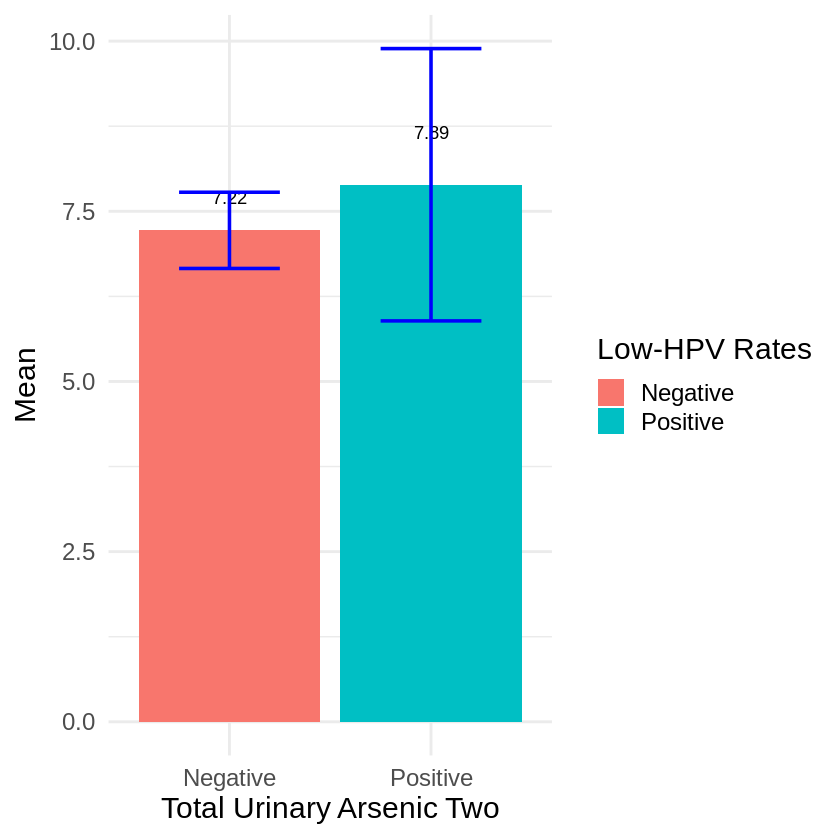

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Total Urinary Arsenic Two", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)










The bar plot above shows the means of the negative and positive values for low HPV. 